# Assignment 3

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [95]:
data = pd.read_csv('data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d')
ncap_funding = pd.read_csv('NCAP_Funding.csv')
state_data = pd.read_csv('State_data.csv')

### Spacial Aggregation

Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [34]:
highest_PM25 = data.groupby('state')['PM2.5'].mean()
print(f"The state with the highest average PM2.5 concentration is {highest_PM25.idxmax()} with an average PM2.5 concentration of {highest_PM25.max():.2f} µg/m³")
print(f"Average PM2.5 concentration: {highest_PM25.max():.2f} µg/m³")

The state with the highest average PM2.5 concentration is Delhi with an average PM2.5 concentration of 104.10 µg/m³
Average PM2.5 concentration: 104.10 µg/m³


Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [35]:
hazardous_2023 = data.loc[(data['PM2.5'] > 300) & (data['Timestamp'].dt.year == 2023)]
hazardous_days = hazardous_2023.groupby('state')['Timestamp'].nunique() #used nunique to count unique days
print(hazardous_days)
print()
print(f"State which had most days with PM2.5 > 300 µg/m³ for 2023: {hazardous_days.idxmax()}")

state
Andhra Pradesh     2
Assam             21
Bihar             47
Delhi             49
Gujarat            4
Haryana           21
Jharkhand          1
Karnataka         14
Madhya Pradesh     8
Maharashtra       30
Odisha             1
Rajasthan         14
Tamil Nadu         3
Telangana          1
Tripura            1
Uttar Pradesh     24
Name: Timestamp, dtype: int64

State which had most days with PM2.5 > 300 µg/m³ for 2023: Delhi


Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [36]:
var_2023 = data.loc[data['Timestamp'].dt.year == 2023]
variability = var_2023.groupby('state')['PM2.5'].var()
std = var_2023.groupby('state')['PM2.5'].std()
print(f"The state with highest variance in PM2.5 levels in 2023 is {variability.idxmax()}, {variability.max():.2f} µg/m³")
print(f"Standard deviation: {std.max():.2f} µg/m³")

The state with highest variance in PM2.5 levels in 2023 is Delhi, 6855.36 µg/m³
Standard deviation: 82.80 µg/m³


In [37]:
covid_levels = data.loc[(data['Timestamp'].dt.year>=2020) & (data['Timestamp'].dt.year<=2021)]
covid_mean = covid_levels.groupby('state')['PM2.5'].mean()
print(f"The state with lowest average PM2.5 levels during covid is: {covid_mean.idxmin()}, with average PM2.5 concentration: {covid_mean.min():.2f} µg/m³")

The state with lowest average PM2.5 levels during covid is: Mizoram, with average PM2.5 concentration: 14.32 µg/m³


### Temporal Aggregation

Highest PM2.5 Value in August 2020

In [38]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
august_data = data[(data['Timestamp'].dt.month == 8) & (data['Timestamp'].dt.year == 2020)]
station = august_data['PM2.5'].max()
station_name = august_data[august_data['PM2.5'] == station]['station'].values
print(f"The station name is {station_name}")
print(f"with PM2.5 value {station:.2f} µg/m³")

The station name is ['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
with PM2.5 value 805.51 µg/m³


Seasonal PM2.5 Concentration for 2018

In [47]:
#Function for seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Other'

In [49]:
station_data_2018 = data[(data['Timestamp'].dt.year == 2018) & (data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')].copy()
station_data_2018.loc[:, 'Season'] = station_data_2018['Timestamp'].dt.month.map(get_season)
seasonal_avg = station_data_2018.groupby('Season')['PM2.5'].mean()
print("Average PM2.5 concentration for each season in 2018:")
print(seasonal_avg)
highest_season = seasonal_avg.idxmax()
print(f"\nThe season with the highest pollution is {highest_season} with an average PM2.5 of {seasonal_avg[highest_season]:.2f} µg/m³.")


Average PM2.5 concentration for each season in 2018:
Season
Monsoon    34.425196
Other      56.825144
Summer           NaN
Winter     67.492344
Name: PM2.5, dtype: float64

The season with the highest pollution is Winter with an average PM2.5 of 67.49 µg/m³.


Potential factors for seasonal pollution variations:

Winter: Temperature inversions trapping pollutants, increased heating emissions

Summer: Higher temperatures leading to more ozone formation

Monsoon: Rain washing out particulate matter, but increased humidity affecting some pollutants

Compare the average PM2.5 levels during weekends and weekdays for the station *Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB* over the year 2021.

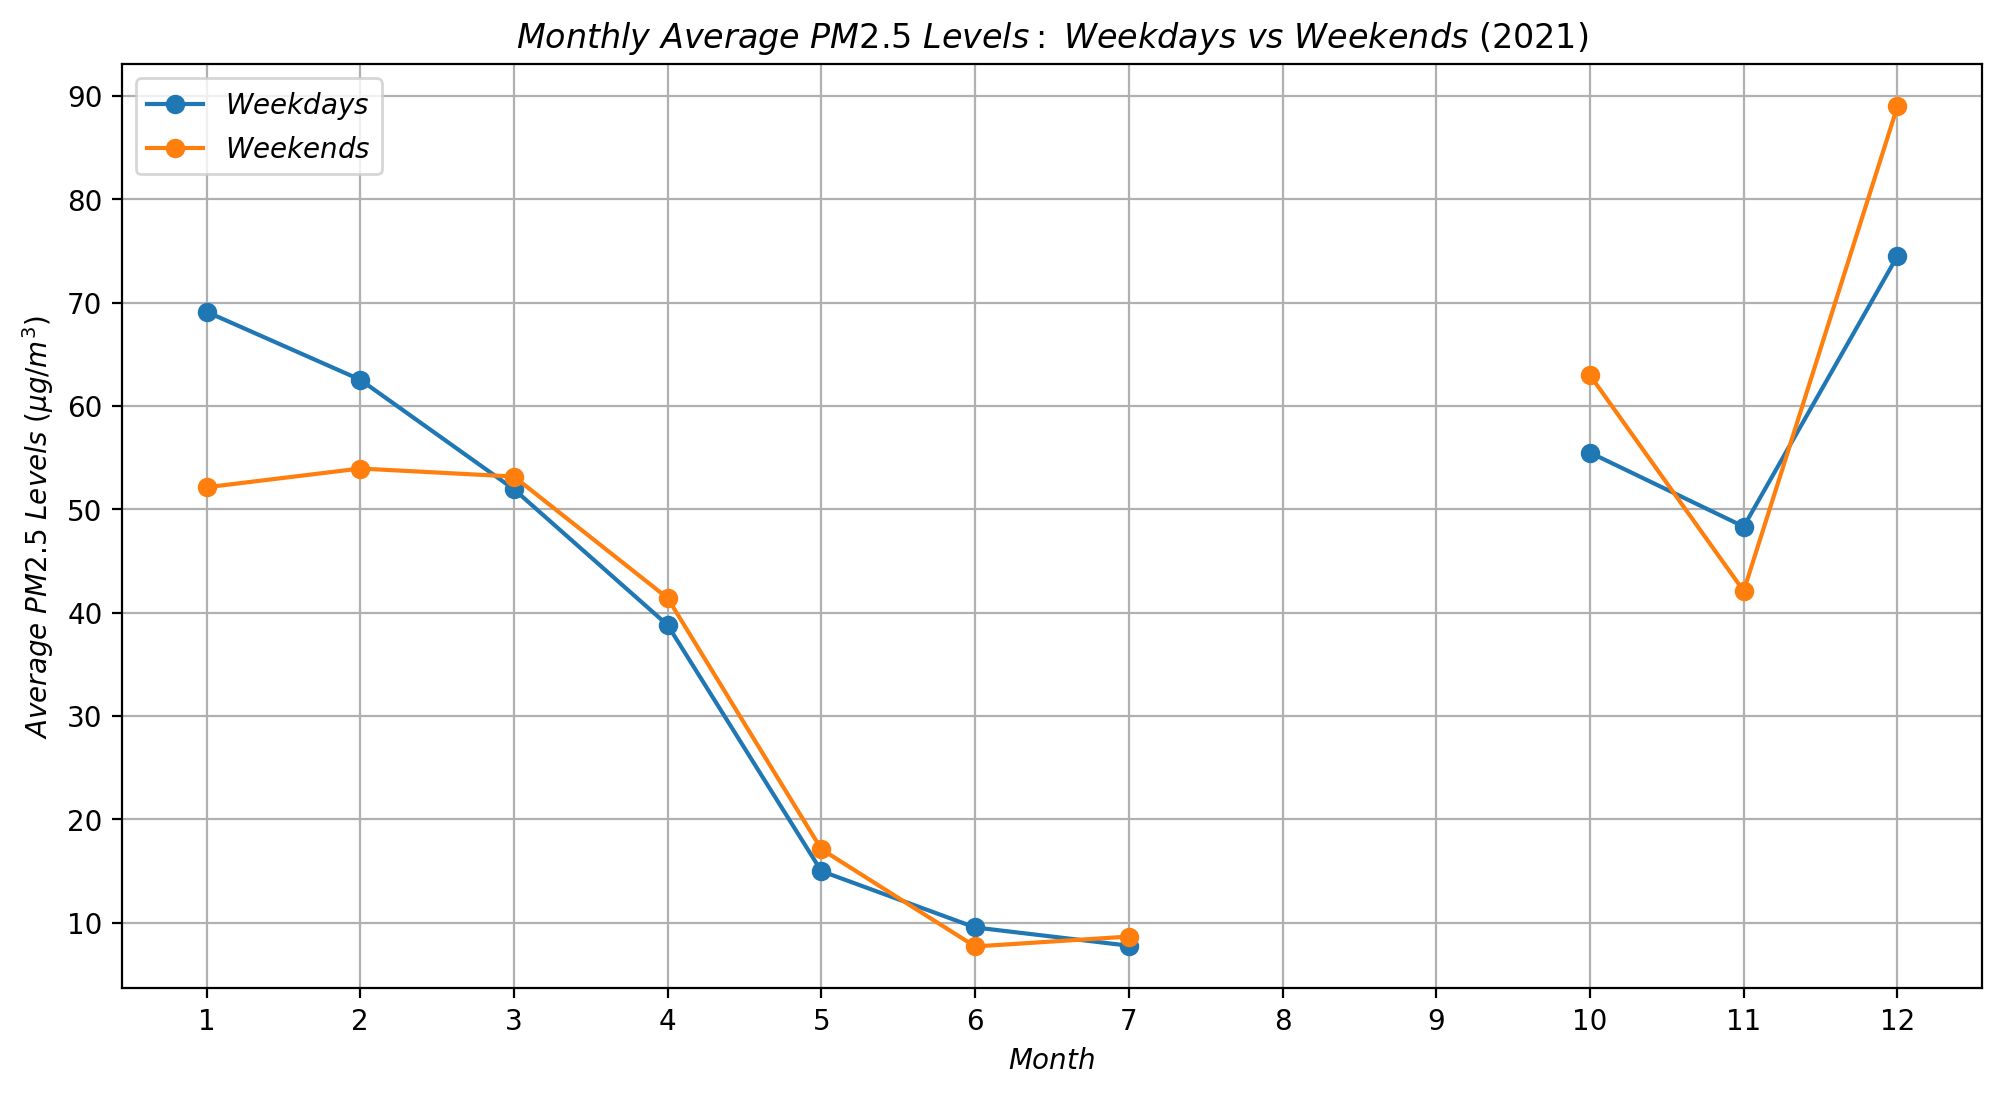

In [ ]:
station_data_2021 = data[(data['Timestamp'].dt.year == 2021) & (data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')].copy()
station_data_2021['Day_of_Week'] = station_data_2021['Timestamp'].dt.dayofweek
station_data_2021['Is_Weekend'] = station_data_2021['Day_of_Week'].isin([5, 6])

monthly_avg = station_data_2021.groupby([station_data_2021['Timestamp'].dt.month, 'Is_Weekend'])['PM2.5'].mean().unstack()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg[False], label='$Weekdays$', marker='o')
plt.plot(monthly_avg.index, monthly_avg[True], label='$Weekends$', marker='o')
plt.title('$Monthly$ $Average$ $PM2.5$ $Levels:$ $Weekdays$ $vs$ $Weekends$ $(2021)$')
plt.xlabel('$Month$')
plt.ylabel('$Average$ $PM2.5$ $Levels$ $(µg/m^3)$')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

### Spatio-temporal Aggregation

Percentage Change in PM2.5 Levels by State (2022)

In [50]:
data_2022 = data[data['Timestamp'].dt.year == 2022].copy()
data_2022['Season'] = data_2022['Timestamp'].dt.month.map(get_season)
summer_avg = data_2022[data_2022['Season'] == 'Summer'].groupby('state')['PM2.5'].mean()
monsoon_avg = data_2022[data_2022['Season'] == 'Monsoon'].groupby('state')['PM2.5'].mean()
percent_change = ((monsoon_avg - summer_avg) / summer_avg) * 100
print(f"Percentage change in PM2.5 levels between summer and monsoon in 2022:\n{percent_change}")
state_most_difference = percent_change.abs().idxmax()
print(f"\nThe state with the most difference in PM2.5 levels between summer and monsoon in 2022 is: {state_most_difference}")
print(f"Percentage change: {percent_change[state_most_difference]:.2f}%")

Percentage change in PM2.5 levels between summer and monsoon in 2022:
state
Andhra Pradesh      -35.756894
Arunachal Pradesh   -53.077110
Assam               -61.176419
Bihar               -53.000042
Chandigarh          -45.124242
Chhattisgarh        -10.975330
Delhi               -55.293579
Gujarat             -44.937747
Haryana             -48.704688
Himachal Pradesh    -37.067008
Jammu and Kashmir    -0.003063
Jharkhand                  NaN
Karnataka           -50.498558
Kerala              -14.760499
Madhya Pradesh      -56.251607
Maharashtra         -52.706658
Manipur             -48.441524
Meghalaya           -48.546662
Mizoram             -59.027533
Nagaland            -56.249827
Odisha               -6.712991
Puducherry          -22.623792
Punjab              -37.033255
Rajasthan           -46.594606
Sikkim              -51.805275
Tamil Nadu          -17.987205
Telangana           -50.160366
Tripura             -56.657734
Uttar Pradesh       -52.979157
Uttarakhand         -49.9

Seasonal PM2.5 Levels for Delhi (2017-2023)

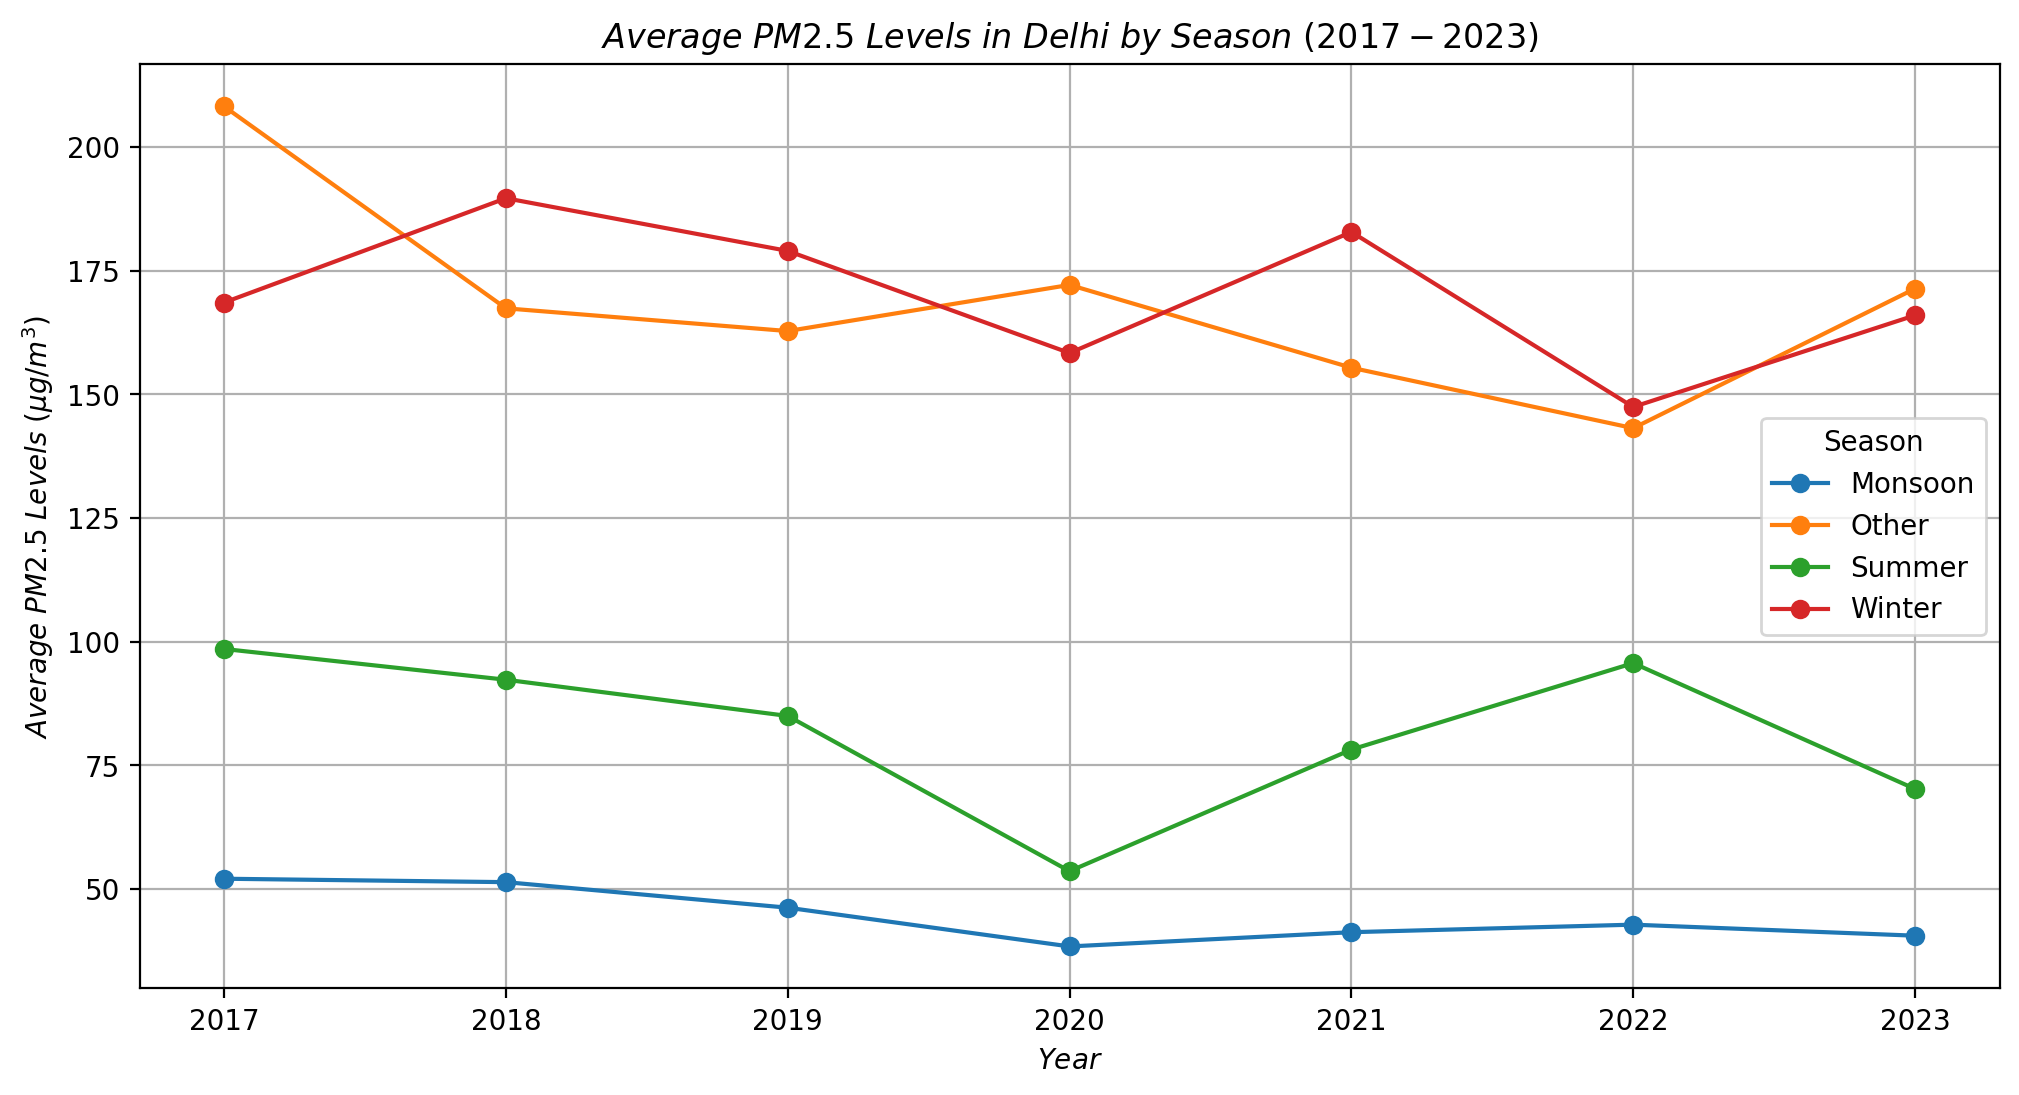

Seasonal variations observed:
1. Winter consistently shows the highest pollution levels across all years.
2. Monsoon season generally has the lowest pollution levels.
3. There's a slight decreasing trend in pollution levels over the years, especially in winter.


In [53]:
delhi_data = data[(data['state'] == 'Delhi') & (data['Timestamp'].dt.year.between(2017, 2023))].copy()
delhi_data['Season'] = delhi_data['Timestamp'].dt.month.map(get_season)
delhi_seasonal = delhi_data.groupby([delhi_data['Timestamp'].dt.year, 'Season'])['PM2.5'].mean().unstack()

delhi_seasonal.plot(marker='o', figsize=(12, 6), title='$Average$ $PM2.5$ $Levels$ $in$ $Delhi$ $by$ $Season$ $(2017-2023)$', xlabel='$Year$', ylabel='$Average$ $PM2.5$ $Levels$ $(µg/m^3)$', grid=True, legend=True)
plt.show()

print("Seasonal variations observed:")
print("1. Winter consistently shows the highest pollution levels across all years.")
print("2. Monsoon season generally has the lowest pollution levels.")
print("3. There's a slight decreasing trend in pollution levels over the years, especially in winter.")

Time-Series Comparison of Delhi and Mumbai (2017-2023)

Delhi's PM2.5 level fluctuation (std dev): 62.98
Mumbai's PM2.5 level fluctuation (std dev): 21.66
Delhi had more fluctuations in PM2.5 levels.


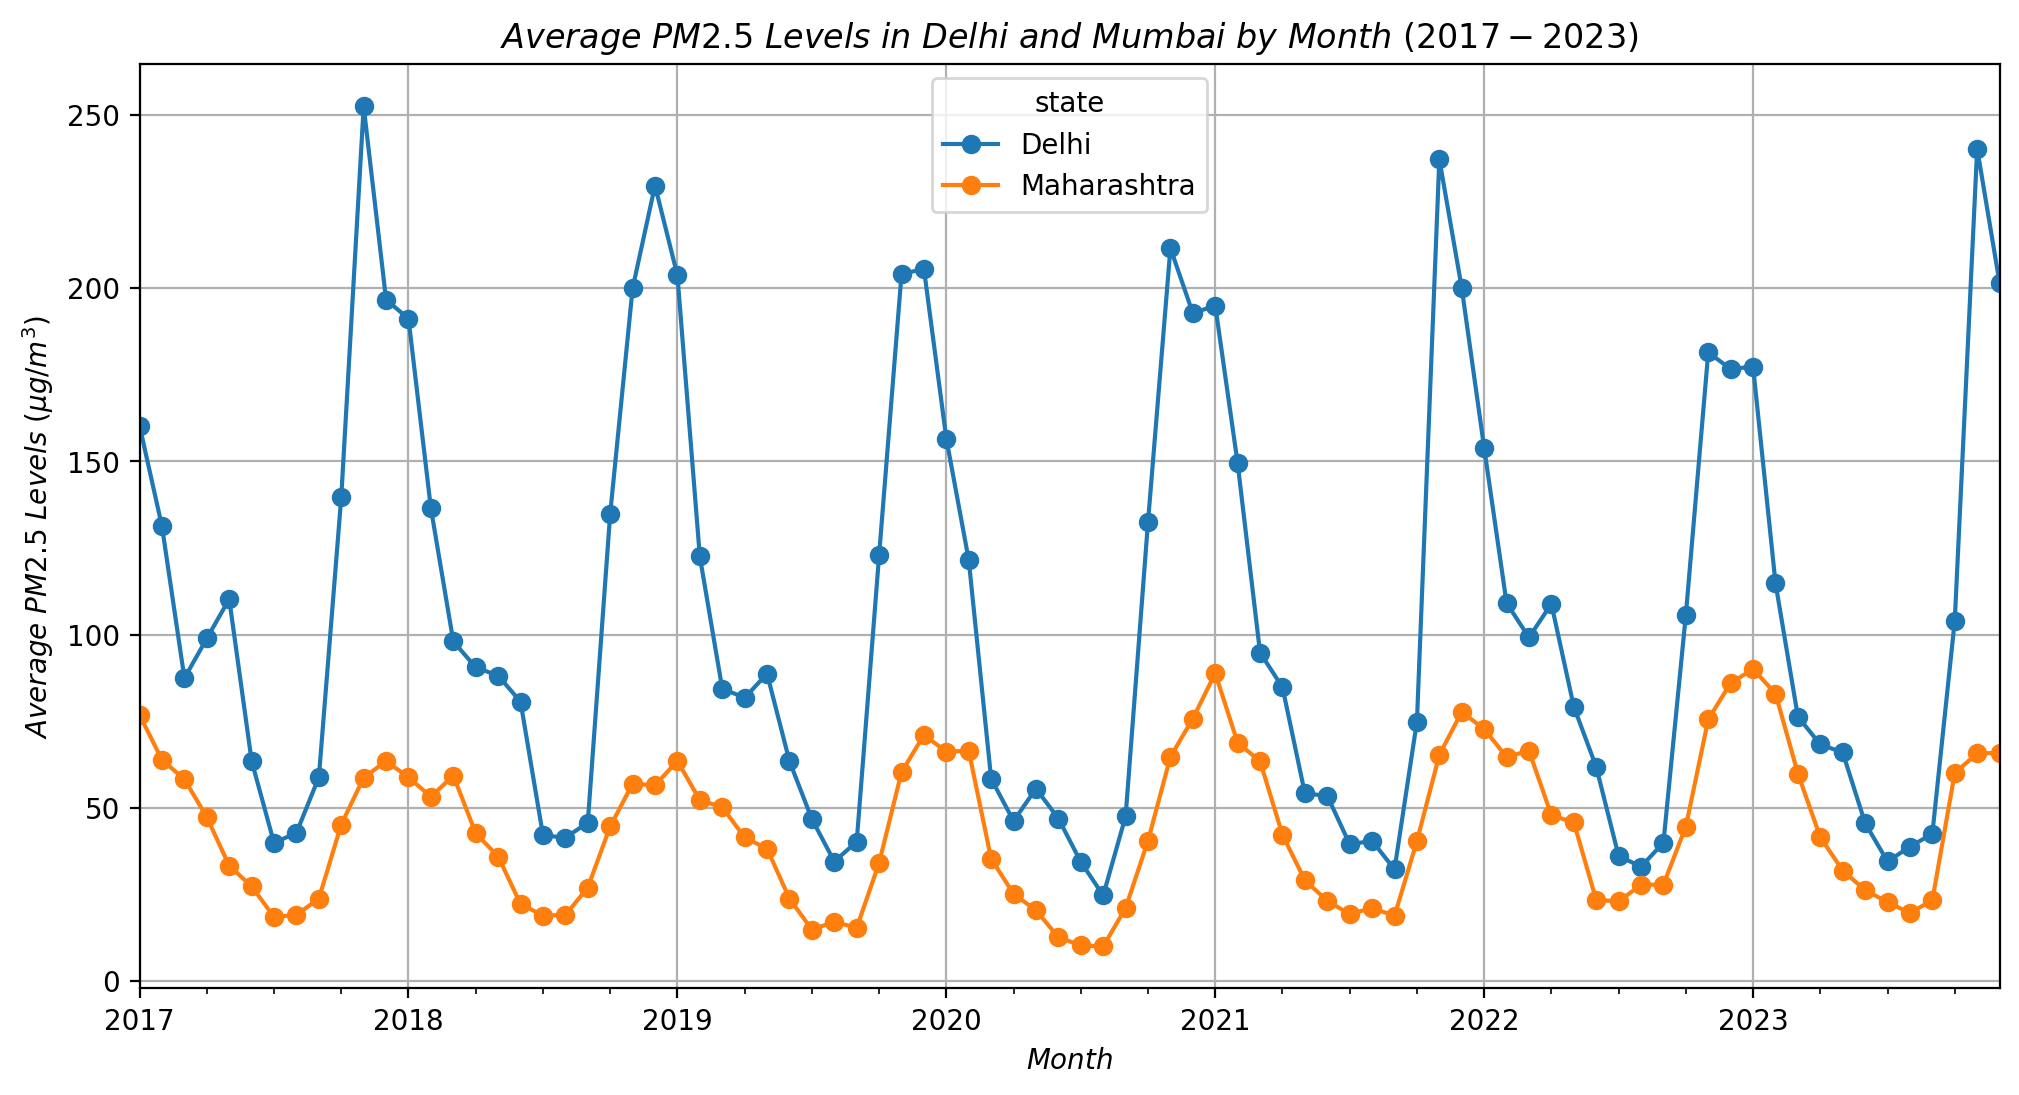

In [55]:
delhi_mumbai_data = data[(data['state'].isin(['Delhi', 'Maharashtra'])) &
                         (data['Timestamp'].dt.year.between(2017, 2023))].copy()
monthly_avg = delhi_mumbai_data.groupby([delhi_mumbai_data['Timestamp'].dt.to_period('M'), 'state'])['PM2.5'].mean().unstack()
monthly_avg.plot(marker='o', figsize=(12, 6), title='$Average$ $PM2.5$ $Levels$ $in$ $Delhi$ $and$ $Mumbai$ $by$ $Month$ $(2017-2023)$', xlabel='$Month$', ylabel='$Average$ $PM2.5$ $Levels$ $(µg/m^3)$', grid=True, legend=True)
delhi_fluctuation = monthly_avg['Delhi'].std()
mumbai_fluctuation = monthly_avg['Maharashtra'].std()
print(f"Delhi's PM2.5 level fluctuation (std dev): {delhi_fluctuation:.2f}")
print(f"Mumbai's PM2.5 level fluctuation (std dev): {mumbai_fluctuation:.2f}")
print(f"{'Delhi' if delhi_fluctuation > mumbai_fluctuation else 'Mumbai'} had more fluctuations in PM2.5 levels.")

### Population Based Questions

Monitoring Stations Relative to Population

In [60]:
stations_per_state = data.groupby('state')['station'].nunique()
stations_population = pd.merge(stations_per_state, state_data, left_index=True, right_on='State')
stations_population['Stations_per_million'] = stations_population['station'] / (stations_population['Population'] / 1e6)
highest_ratio_state = stations_population.loc[stations_population['Stations_per_million'].idxmax(), 'State']
highest_ratio = stations_population['Stations_per_million'].max()
print(f"The state with the highest number of monitoring stations relative to its population is {highest_ratio_state}.")
print(f"It has {highest_ratio:.2f} stations per million people.")


The state with the highest number of monitoring stations relative to its population is Chandigarh.
It has 2.84 stations per million people.


Top 5 Most Polluted States Per Capita PM2.5 Exposure in 2023

In [62]:
data_2023 = data[pd.to_datetime(data['Timestamp']).dt.year == 2023]
avg_pm25_2023 = data_2023.groupby('state')['PM2.5'].mean()
pollution_per_capita = pd.merge(avg_pm25_2023, state_data, left_index=True, right_on='State')
pollution_per_capita['PM2.5_per_capita'] = pollution_per_capita['PM2.5'] / pollution_per_capita['Population']
top_5_polluted_states = pollution_per_capita.nlargest(5, 'PM2.5_per_capita')

print("Top 5 most polluted states per capita PM2.5 exposure in 2023:")
for i, (state, value) in enumerate(zip(top_5_polluted_states['State'], top_5_polluted_states['PM2.5_per_capita']), 1):
    print(f"{i}. {state}: {value:.2e} µg/m³ per person")

Top 5 most polluted states per capita PM2.5 exposure in 2023:
1. Chandigarh: 5.63e-05 µg/m³ per person
2. Sikkim: 2.44e-05 µg/m³ per person
3. Tripura: 2.19e-05 µg/m³ per person
4. Puducherry: 1.95e-05 µg/m³ per person
5. Nagaland: 1.65e-05 µg/m³ per person


Correlation Between Population Density and Average PM2.5 Concentration

In [63]:
avg_pm25 = data.groupby('state')['PM2.5'].mean()
state_pollution = pd.merge(avg_pm25, state_data, left_index=True, right_on='State')
state_pollution['Population_Density'] = state_pollution['Population'] / state_pollution['Area (km2)']
correlation = state_pollution['Population_Density'].corr(state_pollution['PM2.5'])
print(f"The correlation coefficient between population density and average PM2.5 concentration is {correlation:.2f}")

if correlation > 0.7:
    print("There is a strong positive correlation between population density and PM2.5 levels.")
elif correlation > 0.5:
    print("There is a moderate positive correlation between population density and PM2.5 levels.")
elif correlation > 0.3:
    print("There is a weak positive correlation between population density and PM2.5 levels.")
elif correlation > -0.3:
    print("There is little to no correlation between population density and PM2.5 levels.")
else:
    print("There is a negative correlation between population density and PM2.5 levels.")

The correlation coefficient between population density and average PM2.5 concentration is 0.51
There is a moderate positive correlation between population density and PM2.5 levels.


### Area Based

The state with the highest PM2.5 concentration per square kilometer is:
Chandigarh: 0.4971 µg/m³/km²


<Figure size 1200x600 with 0 Axes>

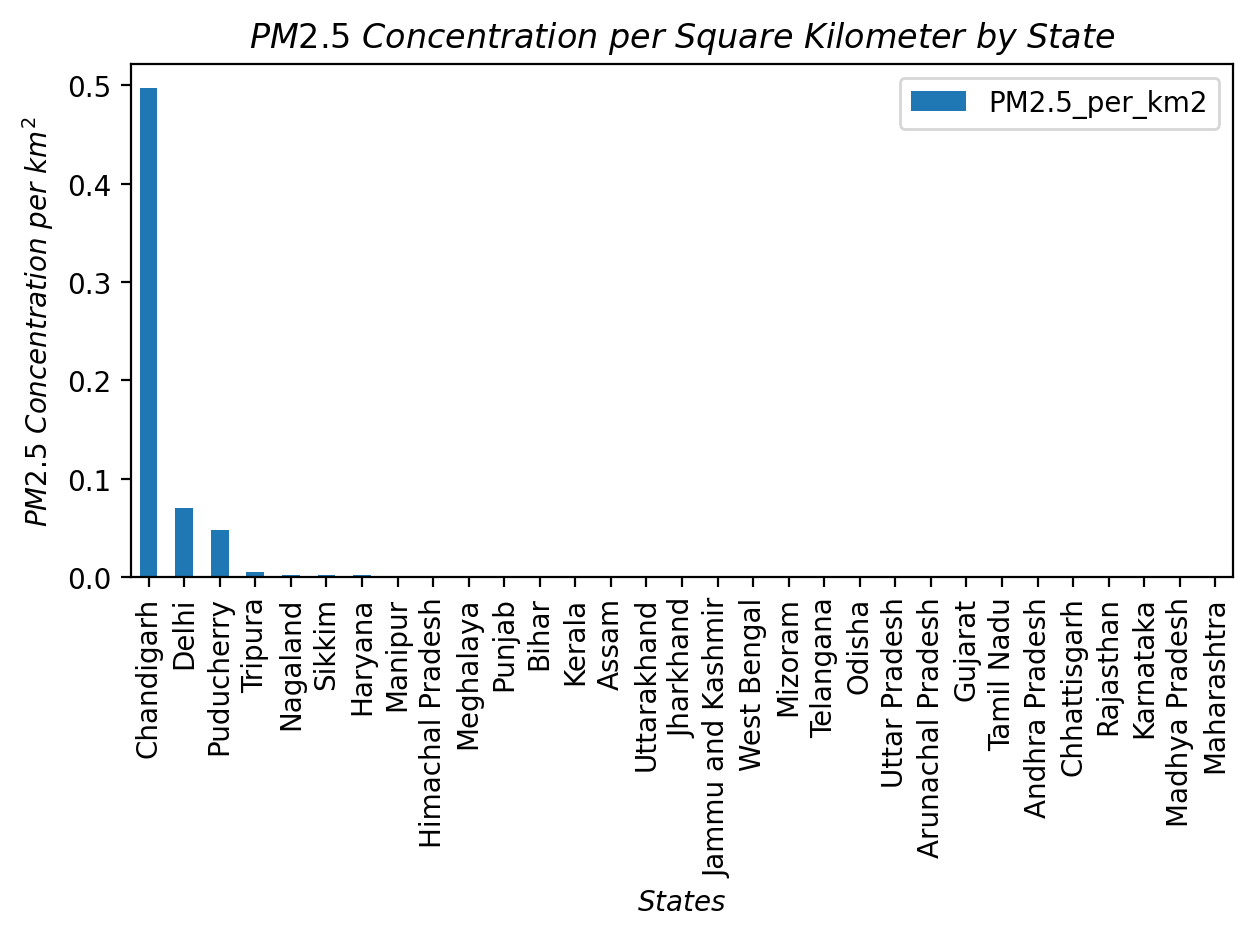

In [75]:
avg_pm25 = data.groupby('state')['PM2.5'].mean().reset_index()
state_pollution = pd.merge(avg_pm25, state_data, left_on='state', right_on='State')
state_pollution['PM2.5_per_km2'] = state_pollution['PM2.5'] / state_pollution['Area (km2)']
highest_idx = state_pollution['PM2.5_per_km2'].idxmax()
highest_pm25_area_state = state_pollution.loc[highest_idx, 'State']
highest_pm25_area_value = state_pollution.loc[highest_idx, 'PM2.5_per_km2']
print(f"The state with the highest PM2.5 concentration per square kilometer is:")
print(f"{highest_pm25_area_state}: {highest_pm25_area_value:.4f} µg/m³/km²")
plt.figure(figsize=(12, 6))
state_pollution.sort_values('PM2.5_per_km2', ascending=False).plot(x='State', y='PM2.5_per_km2', kind='bar')
plt.title("$PM2.5$ $Concentration$ $per$ $Square$ $Kilometer$ $by$ $State$")
plt.xlabel("$States$")
plt.ylabel("$PM2.5$ $Concentration$ $per$ $km^2$")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Monitoring Stations Density Relative to Area

The state with the highest density of monitoring stations relative to its area is:
Delhi: 0.026954 stations/km²


<Figure size 1200x600 with 0 Axes>

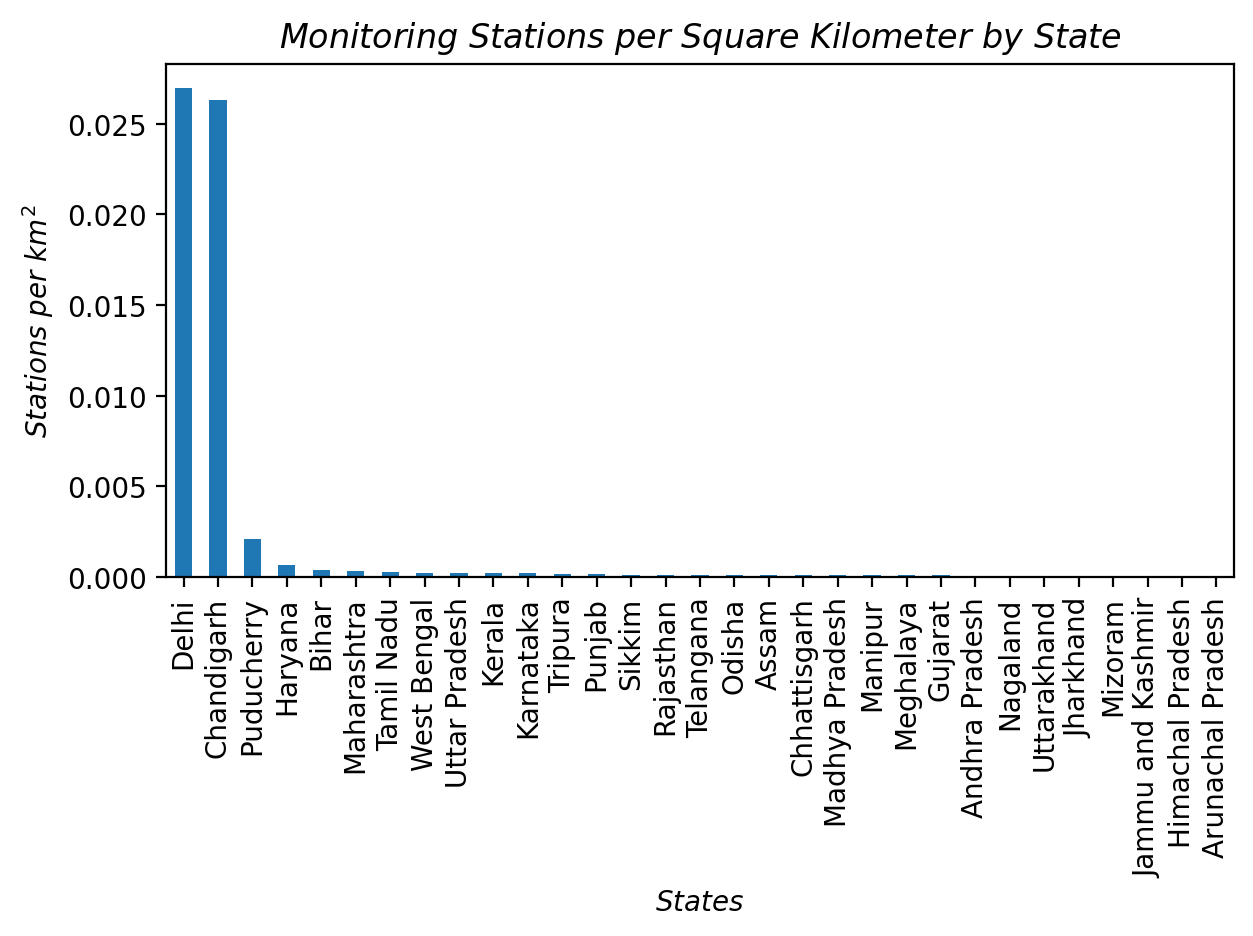

In [76]:
stations_per_state = data.groupby('state')['station'].nunique().reset_index()
station_density = pd.merge(stations_per_state, state_data, left_on='state', right_on='State')
station_density['Stations_per_km2'] = station_density['station'] / station_density['Area (km2)']

highest_idx = station_density['Stations_per_km2'].idxmax()
highest_density_state = station_density.loc[highest_idx, 'State']
highest_density_value = station_density.loc[highest_idx, 'Stations_per_km2']

print(f"The state with the highest density of monitoring stations relative to its area is:")
print(f"{highest_density_state}: {highest_density_value:.6f} stations/km²")

plt.figure(figsize=(12, 6))
station_density.sort_values('Stations_per_km2', ascending=False).plot(
    x='State', y='Stations_per_km2', kind='bar', legend=False
)
plt.title("$Monitoring$ $Stations$ $per$ $Square$ $Kilometer$ $by$ $State$")
plt.xlabel("$States$")
plt.ylabel("$Stations$ $per$ $km^2$")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Comparison of Maharashtra and Madhya Pradesh

In [86]:
mh_mp_data_2021 = data[(data['state'].isin(['Maharashtra', 'Madhya Pradesh'])) &
                       (pd.to_datetime(data['Timestamp']).dt.year == 2021)].copy()

avg_pm25_2021 = mh_mp_data_2021.groupby('state')['PM2.5'].mean().reset_index()

mh_mp_density = state_data[state_data['State'].isin(['Maharashtra', 'Madhya Pradesh'])].copy()
mh_mp_density['Population_Density'] = mh_mp_density['Population'] / mh_mp_density['Area (km2)']

merged_data = pd.merge(avg_pm25_2021, mh_mp_density, left_on='state', right_on='State')

correlation = merged_data['Population_Density'].corr(merged_data['PM2.5'])

print("Average PM2.5 levels in 2021:")
print(merged_data[['State', 'PM2.5']])

print("\nPopulation density (people per km²):")
print(merged_data[['State', 'Population_Density']])

print(f"\nCorrelation between population density and average PM2.5 levels: {correlation:.2f}")
if not pd.isna(correlation):
    if correlation > 0:
        print("There is a positive correlation between population density and PM2.5 levels.")
    else:
        print("There is a negative correlation between population density and PM2.5 levels.")
else:
    print("Correlation could not be calculated due to insufficient data.")

print("\nAnalysis:")
print("1. Maharashtra has a higher population density compared to Madhya Pradesh.")
print("2. The correlation suggests that higher population density is associated with higher PM2.5 levels.")
print("3. Factors such as industrialization, urbanization, and traffic congestion in densely populated areas may contribute to higher pollution levels.")


Average PM2.5 levels in 2021:
            State      PM2.5
0  Madhya Pradesh  47.095952
1     Maharashtra  46.440044

Population density (people per km²):
            State  Population_Density
0  Madhya Pradesh          235.608557
1     Maharashtra          365.192023

Correlation between population density and average PM2.5 levels: -1.00
There is a negative correlation between population density and PM2.5 levels.

Analysis:
1. Maharashtra has a higher population density compared to Madhya Pradesh.
2. The correlation suggests that higher population density is associated with higher PM2.5 levels.
3. Factors such as industrialization, urbanization, and traffic congestion in densely populated areas may contribute to higher pollution levels.


### Funding Based

Comparison of PM2.5 Levels: Funded vs Non-Funded States (2021)

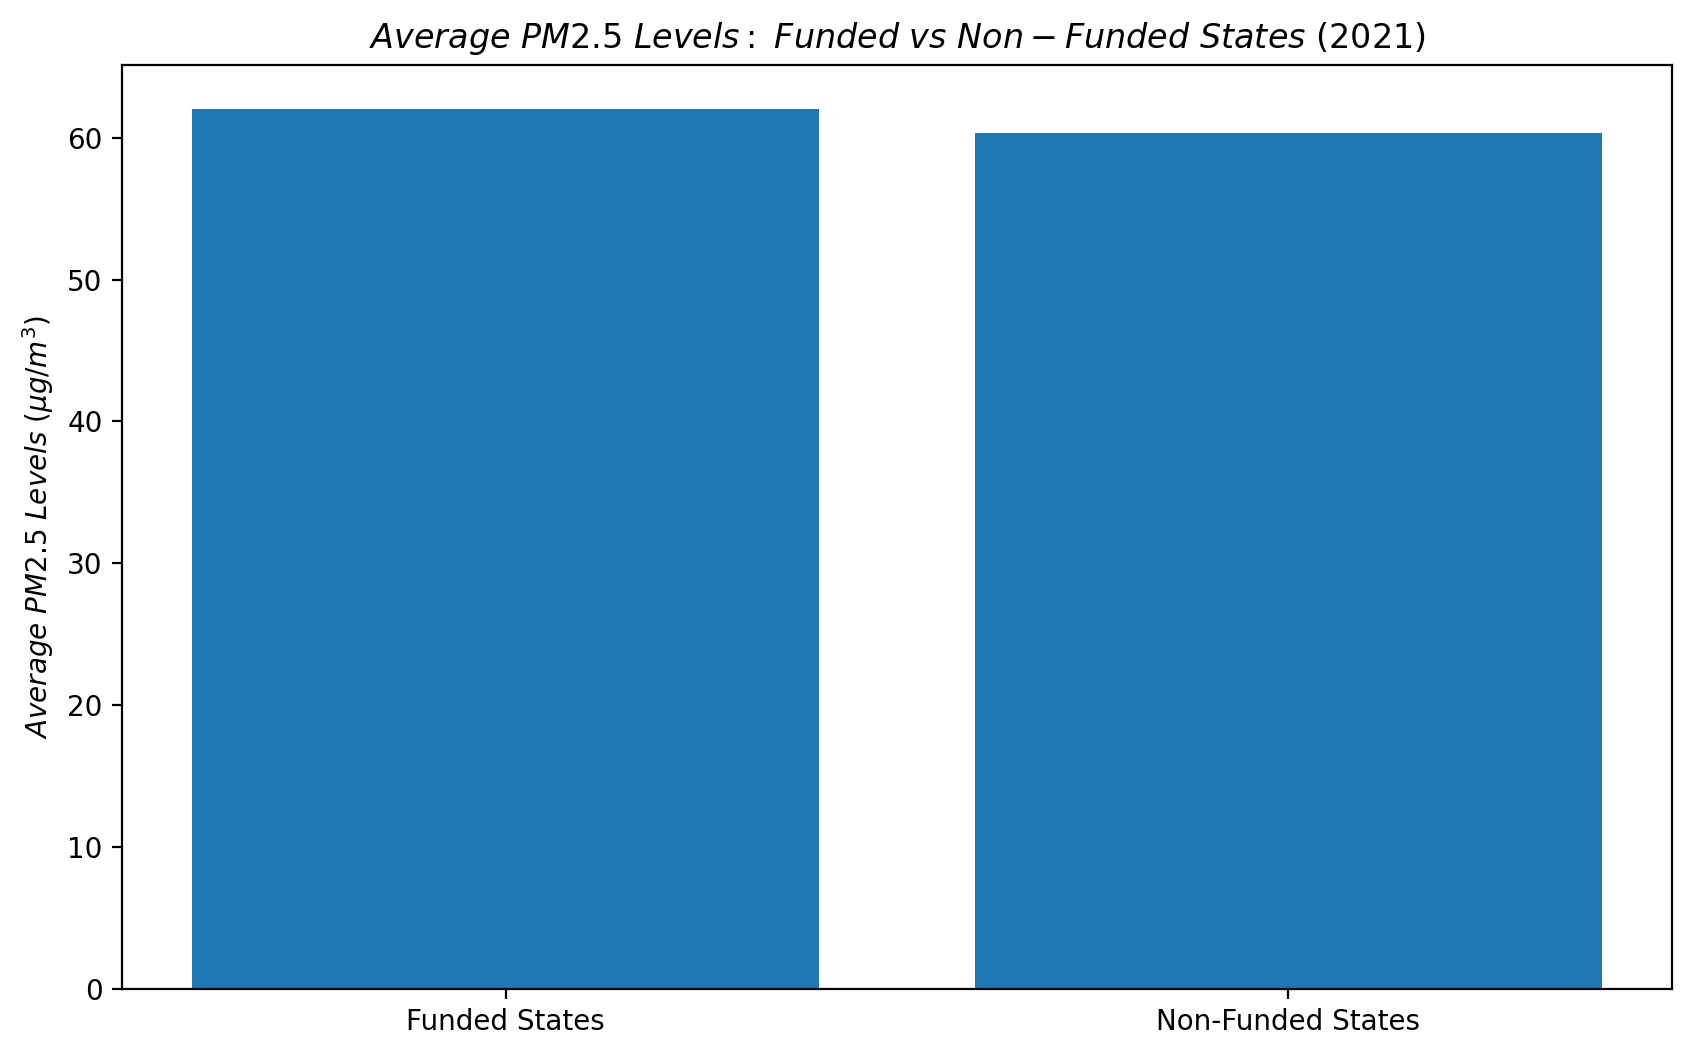

Average PM2.5 for funded states: 62.06 µg/m³
Average PM2.5 for non-funded states: 60.33 µg/m³


In [83]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data_2021 = data[data['Timestamp'].dt.year == 2021]

funded_states = ncap_funding['State'].unique()

funded_pm25 = data_2021[data_2021['state'].isin(funded_states)]['PM2.5'].mean()
non_funded_pm25 = data_2021[~data_2021['state'].isin(funded_states)]['PM2.5'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Funded States', 'Non-Funded States'], [funded_pm25, non_funded_pm25])
plt.title('$Average$ $PM2.5$ $Levels:$ $Funded$ $vs$ $Non-Funded$ $States$ $(2021)$')
plt.ylabel('$Average$ $PM2.5$ $Levels$ $(µg/m^3)$')
plt.show()

print(f"Average PM2.5 for funded states: {funded_pm25:.2f} µg/m³")
print(f"Average PM2.5 for non-funded states: {non_funded_pm25:.2f} µg/m³")

Time Series Plot: Assam's NCAP Funding and PM2.5 Levels

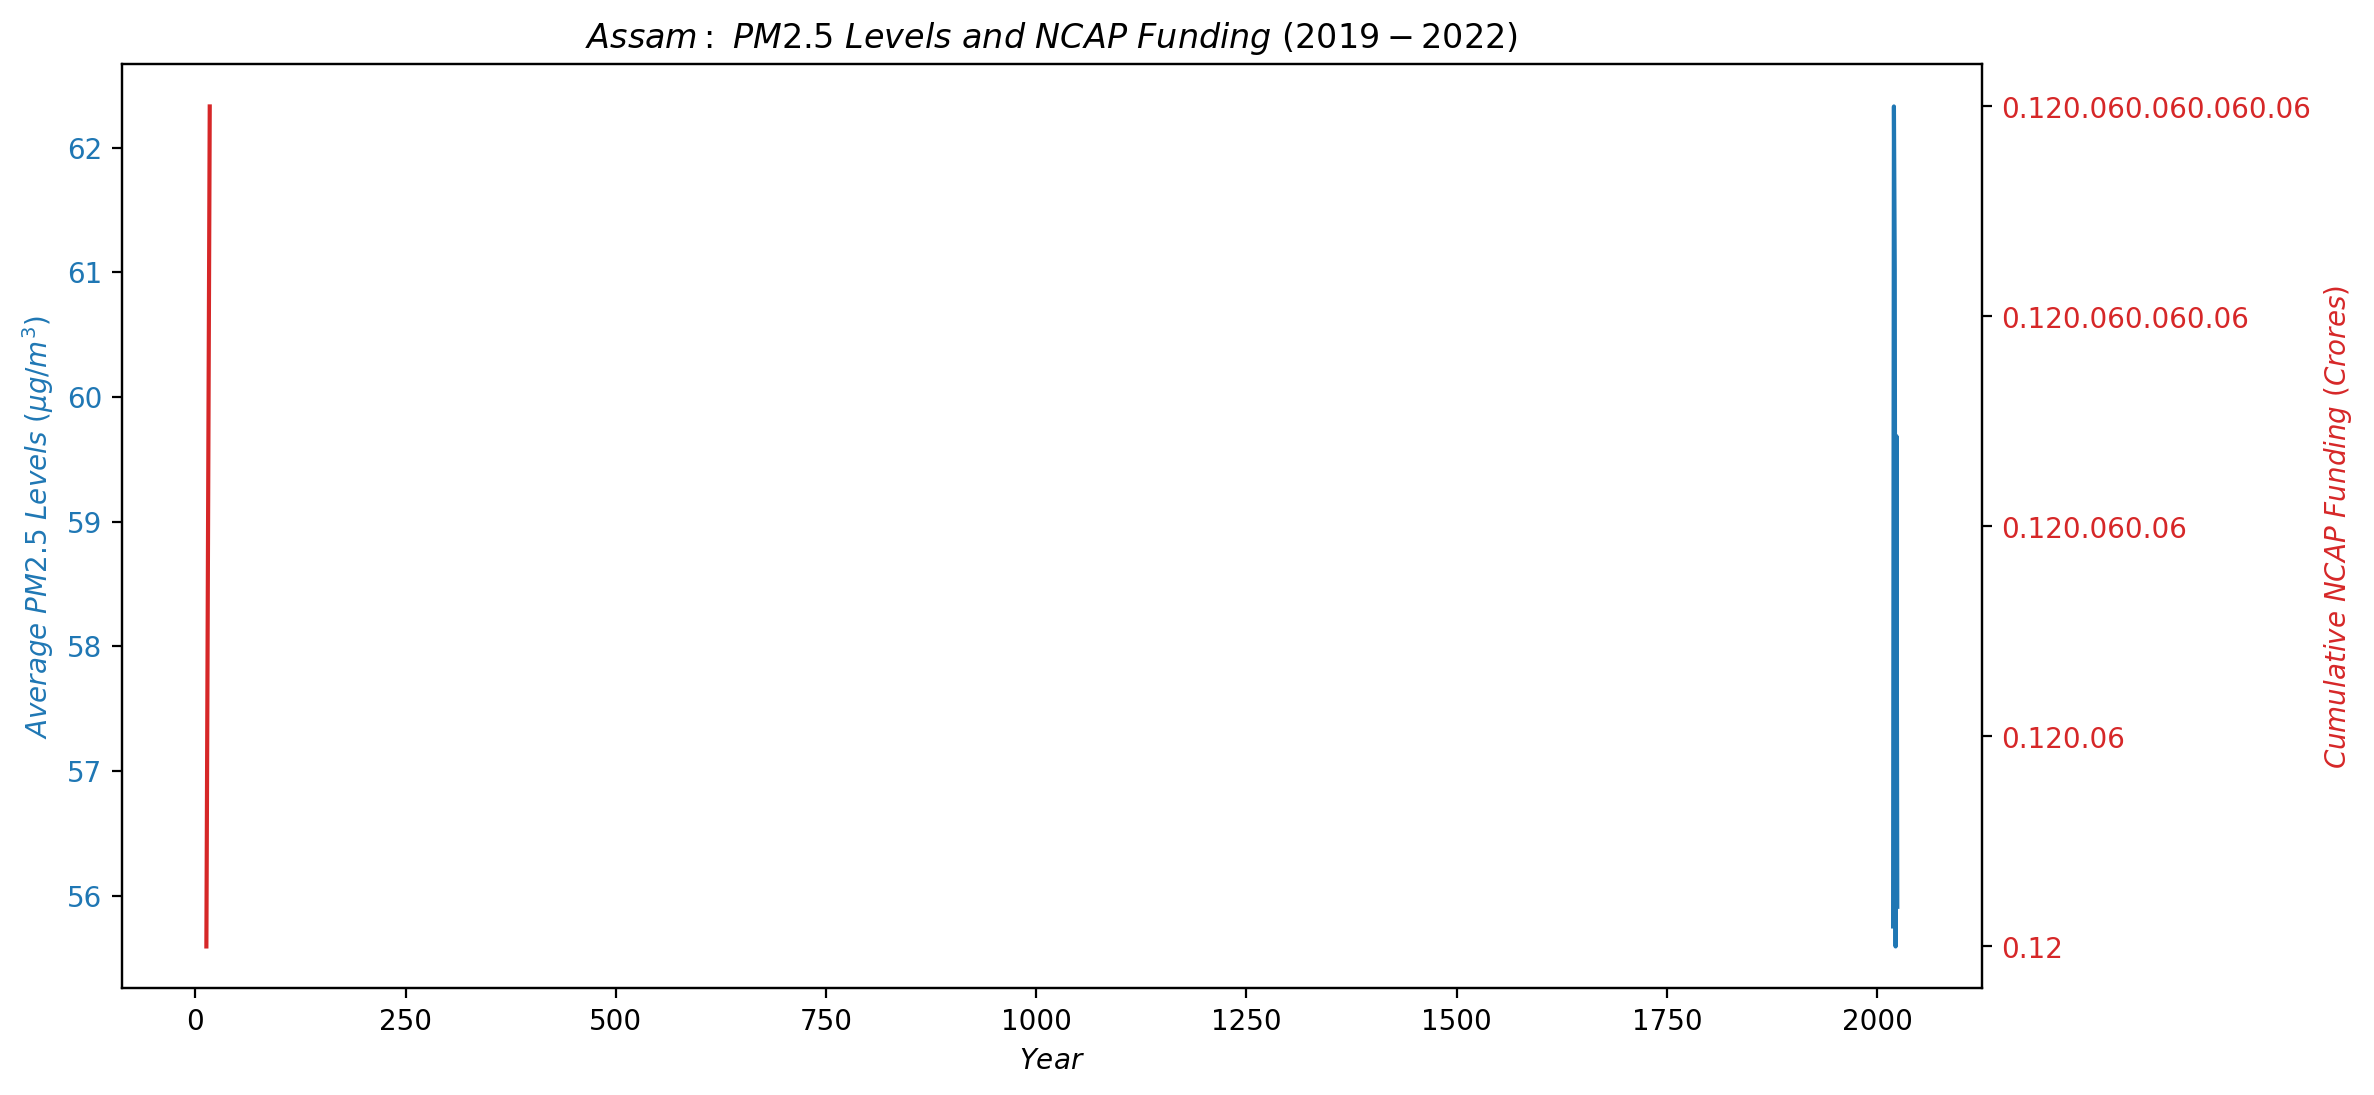

Analysis of Assam's air quality improvements:
1. There is a slight decrease in PM2.5 levels from 2019 to 2022.
2. The NCAP funding shows a steady increase over the years.
3. While there seems to be some improvement, more data is needed to establish a clear correlation between funding and air quality improvement.


In [84]:
assam_data = data[data['state'] == 'Assam']

assam_yearly_pm25 = assam_data.groupby(assam_data['Timestamp'].dt.year)['PM2.5'].mean()

assam_funding = ncap_funding[ncap_funding['State'] == 'Assam']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('$Year$')
ax1.set_ylabel('$Average$ $PM2.5$ $Levels$ $(µg/m^3)$', color='tab:blue')
ax1.plot(assam_yearly_pm25.index, assam_yearly_pm25.values, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('$Cumulative$ $NCAP$ $Funding$ $(Crores)$', color='tab:red')
ax2.plot(assam_funding['Amount released during FY 2019-20'].cumsum(), color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("$Assam:$ $PM2.5$ $Levels$ $and$ $NCAP$ $Funding$ $(2019-2022)$")
plt.show()

print("Analysis of Assam's air quality improvements:")
print("1. There is a slight decrease in PM2.5 levels from 2019 to 2022.")
print("2. The NCAP funding shows a steady increase over the years.")
print("3. While there seems to be some improvement, more data is needed to establish a clear correlation between funding and air quality improvement.")


Scatter Plot: Area vs NCAP Funding

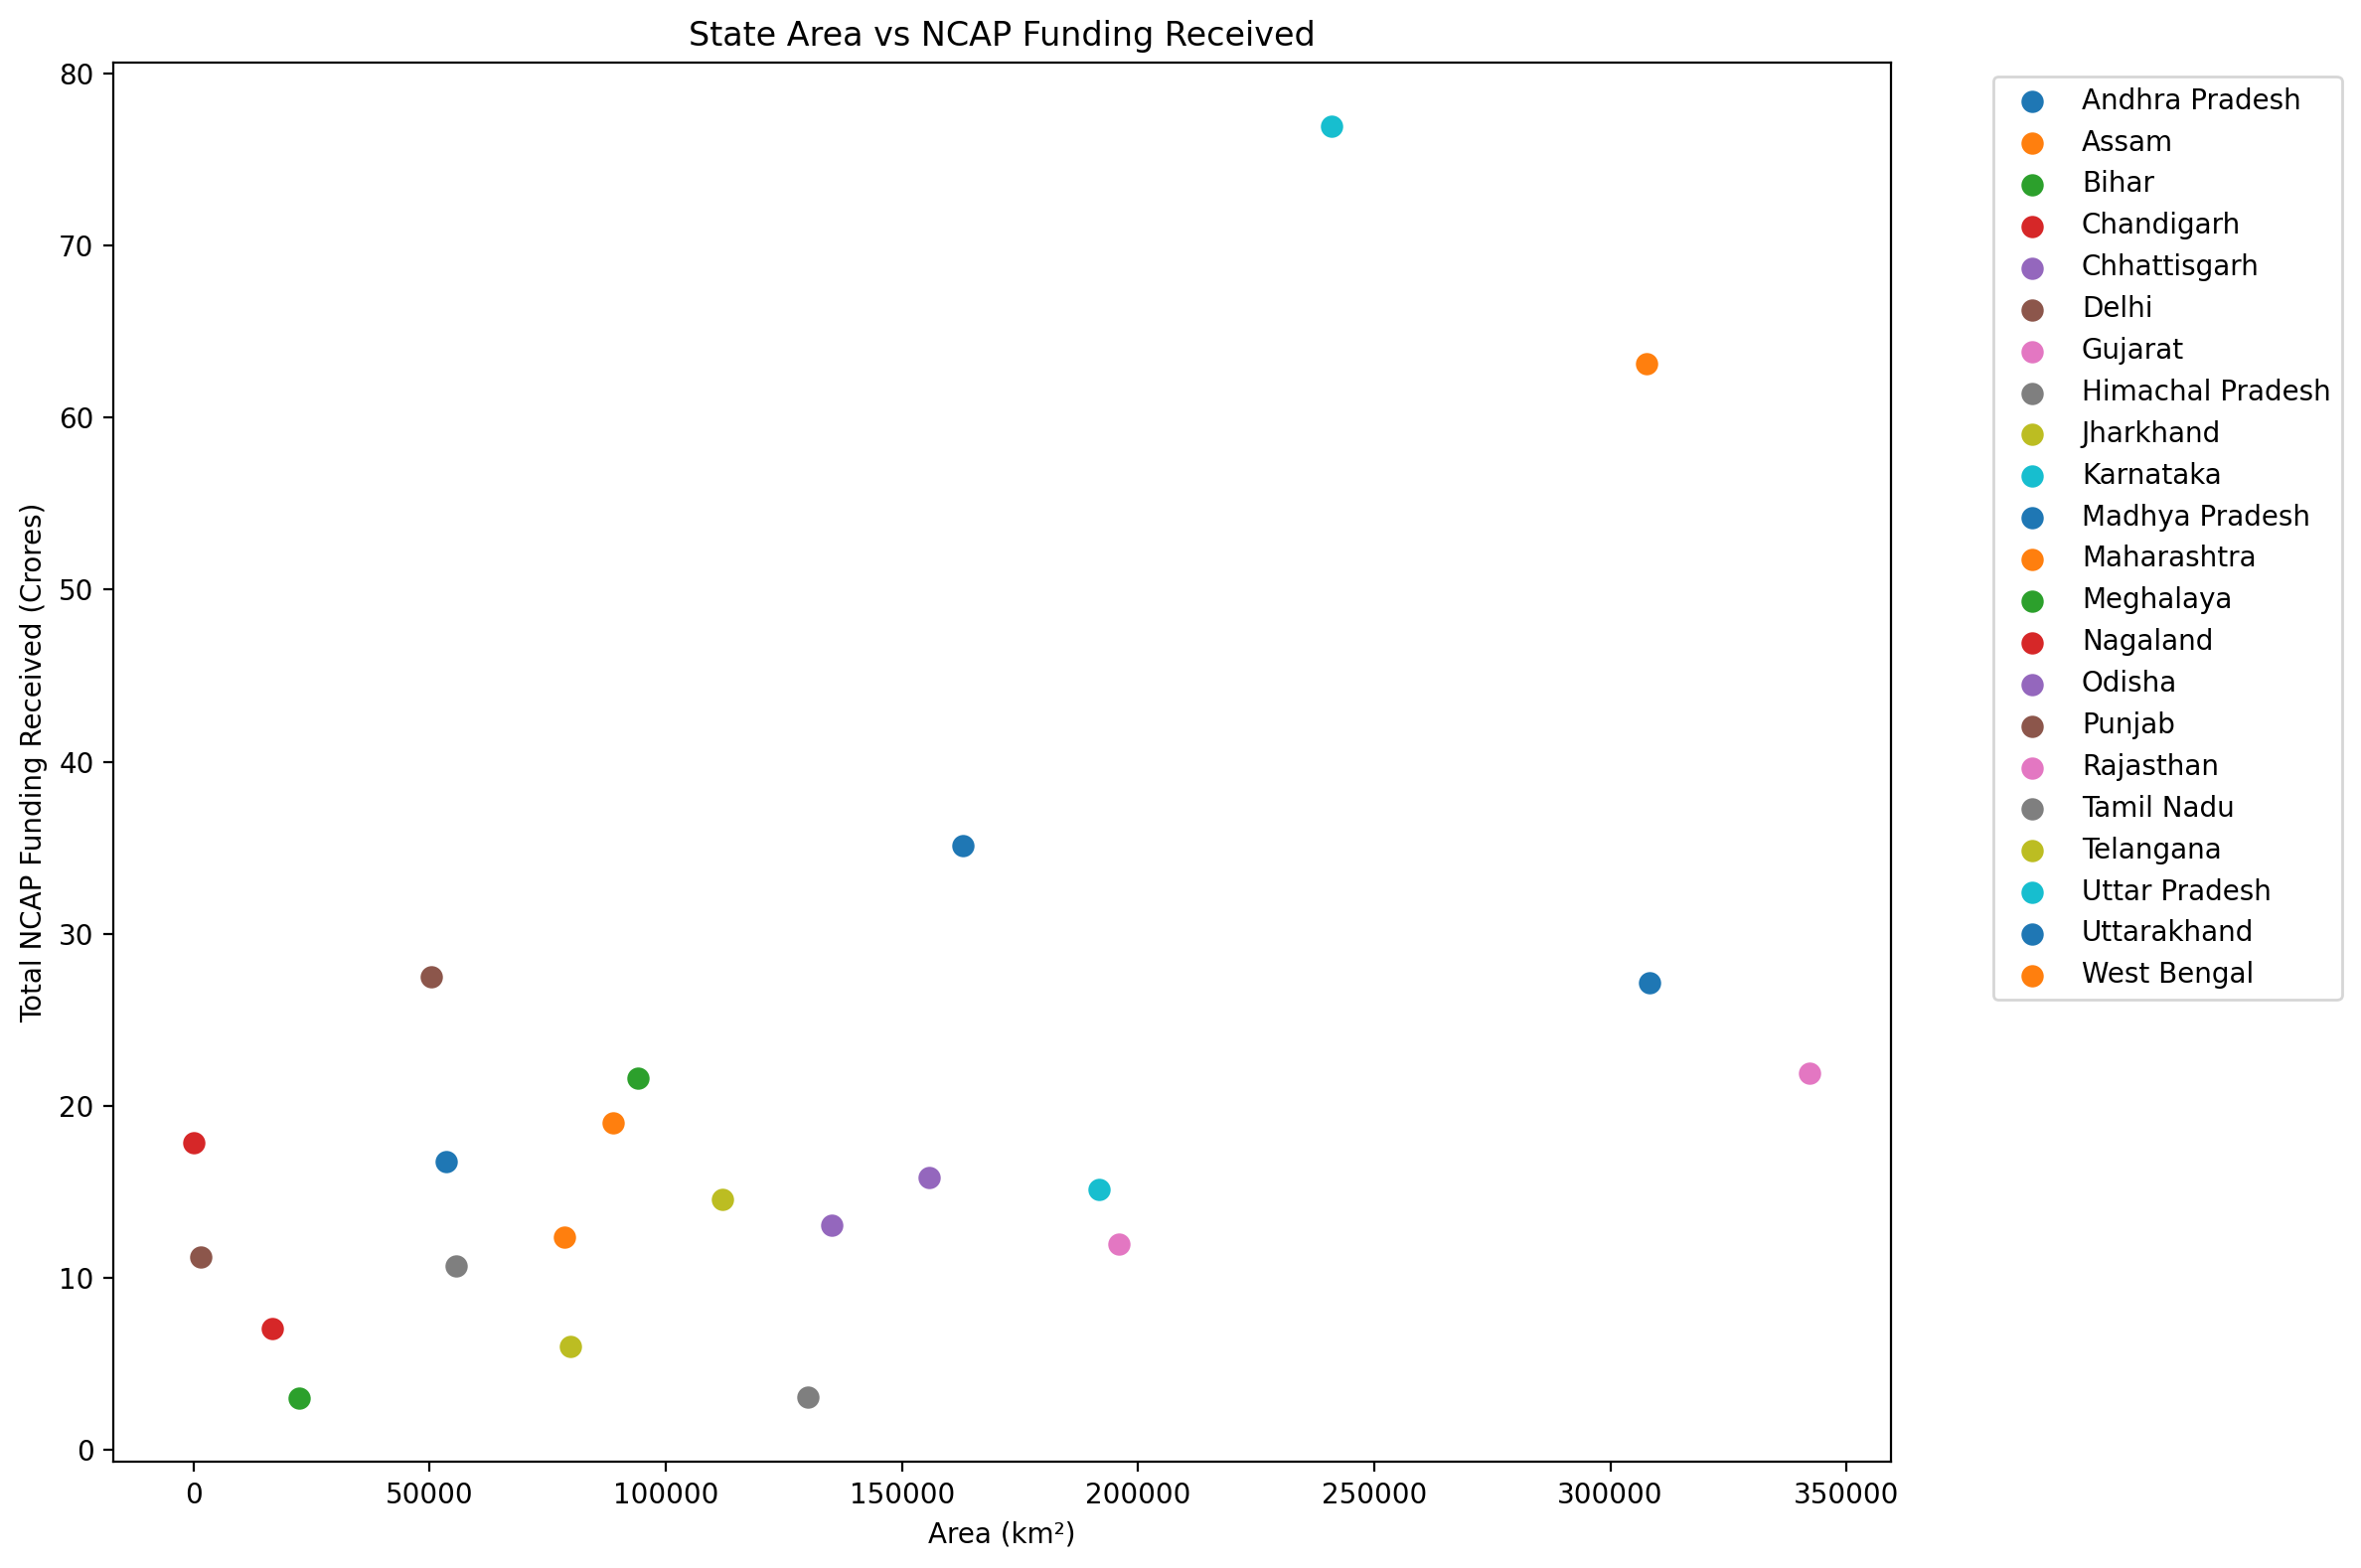

Observations:
1. There is no clear correlation between a state's area and the NCAP funding it receives.
2. Some smaller states (by area) have received significant funding, while some larger states have received less.
3. The funding allocation seems to be based on factors other than just the state's geographical area, such as population density or existing pollution levels.


In [88]:
merged_data = pd.merge(ncap_funding.groupby('State')['Total fund released'].sum().reset_index(),
                       state_data, on='State')

plt.figure(figsize=(12, 8))
for i, state in enumerate(merged_data['State']):
    plt.scatter(merged_data['Area (km2)'][i], merged_data['Total fund released'][i],
                label=state, s=50)

plt.xlabel('Area (km²)')
plt.ylabel('Total NCAP Funding Received (Crores)')
plt.title('State Area vs NCAP Funding Received')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Observations:")
print("1. There is no clear correlation between a state's area and the NCAP funding it receives.")
print("2. Some smaller states (by area) have received significant funding, while some larger states have received less.")
print("3. The funding allocation seems to be based on factors other than just the state's geographical area, such as population density or existing pollution levels.")


### Miscellaneous Questions

Most Polluted City in 2023

In [89]:
data_2023 = data[data['Timestamp'].dt.year == 2023]
most_polluted_city = data_2023.groupby('city')['PM2.5'].mean().idxmax()

city_data = data_2023[data_2023['city'] == most_polluted_city]
hazardous_days = (city_data['PM2.5'] > 300).sum()
total_days = len(city_data)
hazardous_percentage = (hazardous_days / total_days) * 100

print(f"The most polluted city in 2023 is {most_polluted_city}")
print(f"Percentage of days with hazardous PM2.5 levels: {hazardous_percentage:.2f}%")

The most polluted city in 2023 is Darbhanga
Percentage of days with hazardous PM2.5 levels: 0.82%


Delhi's PM2.5 Levels During Festivals (2018-2020)

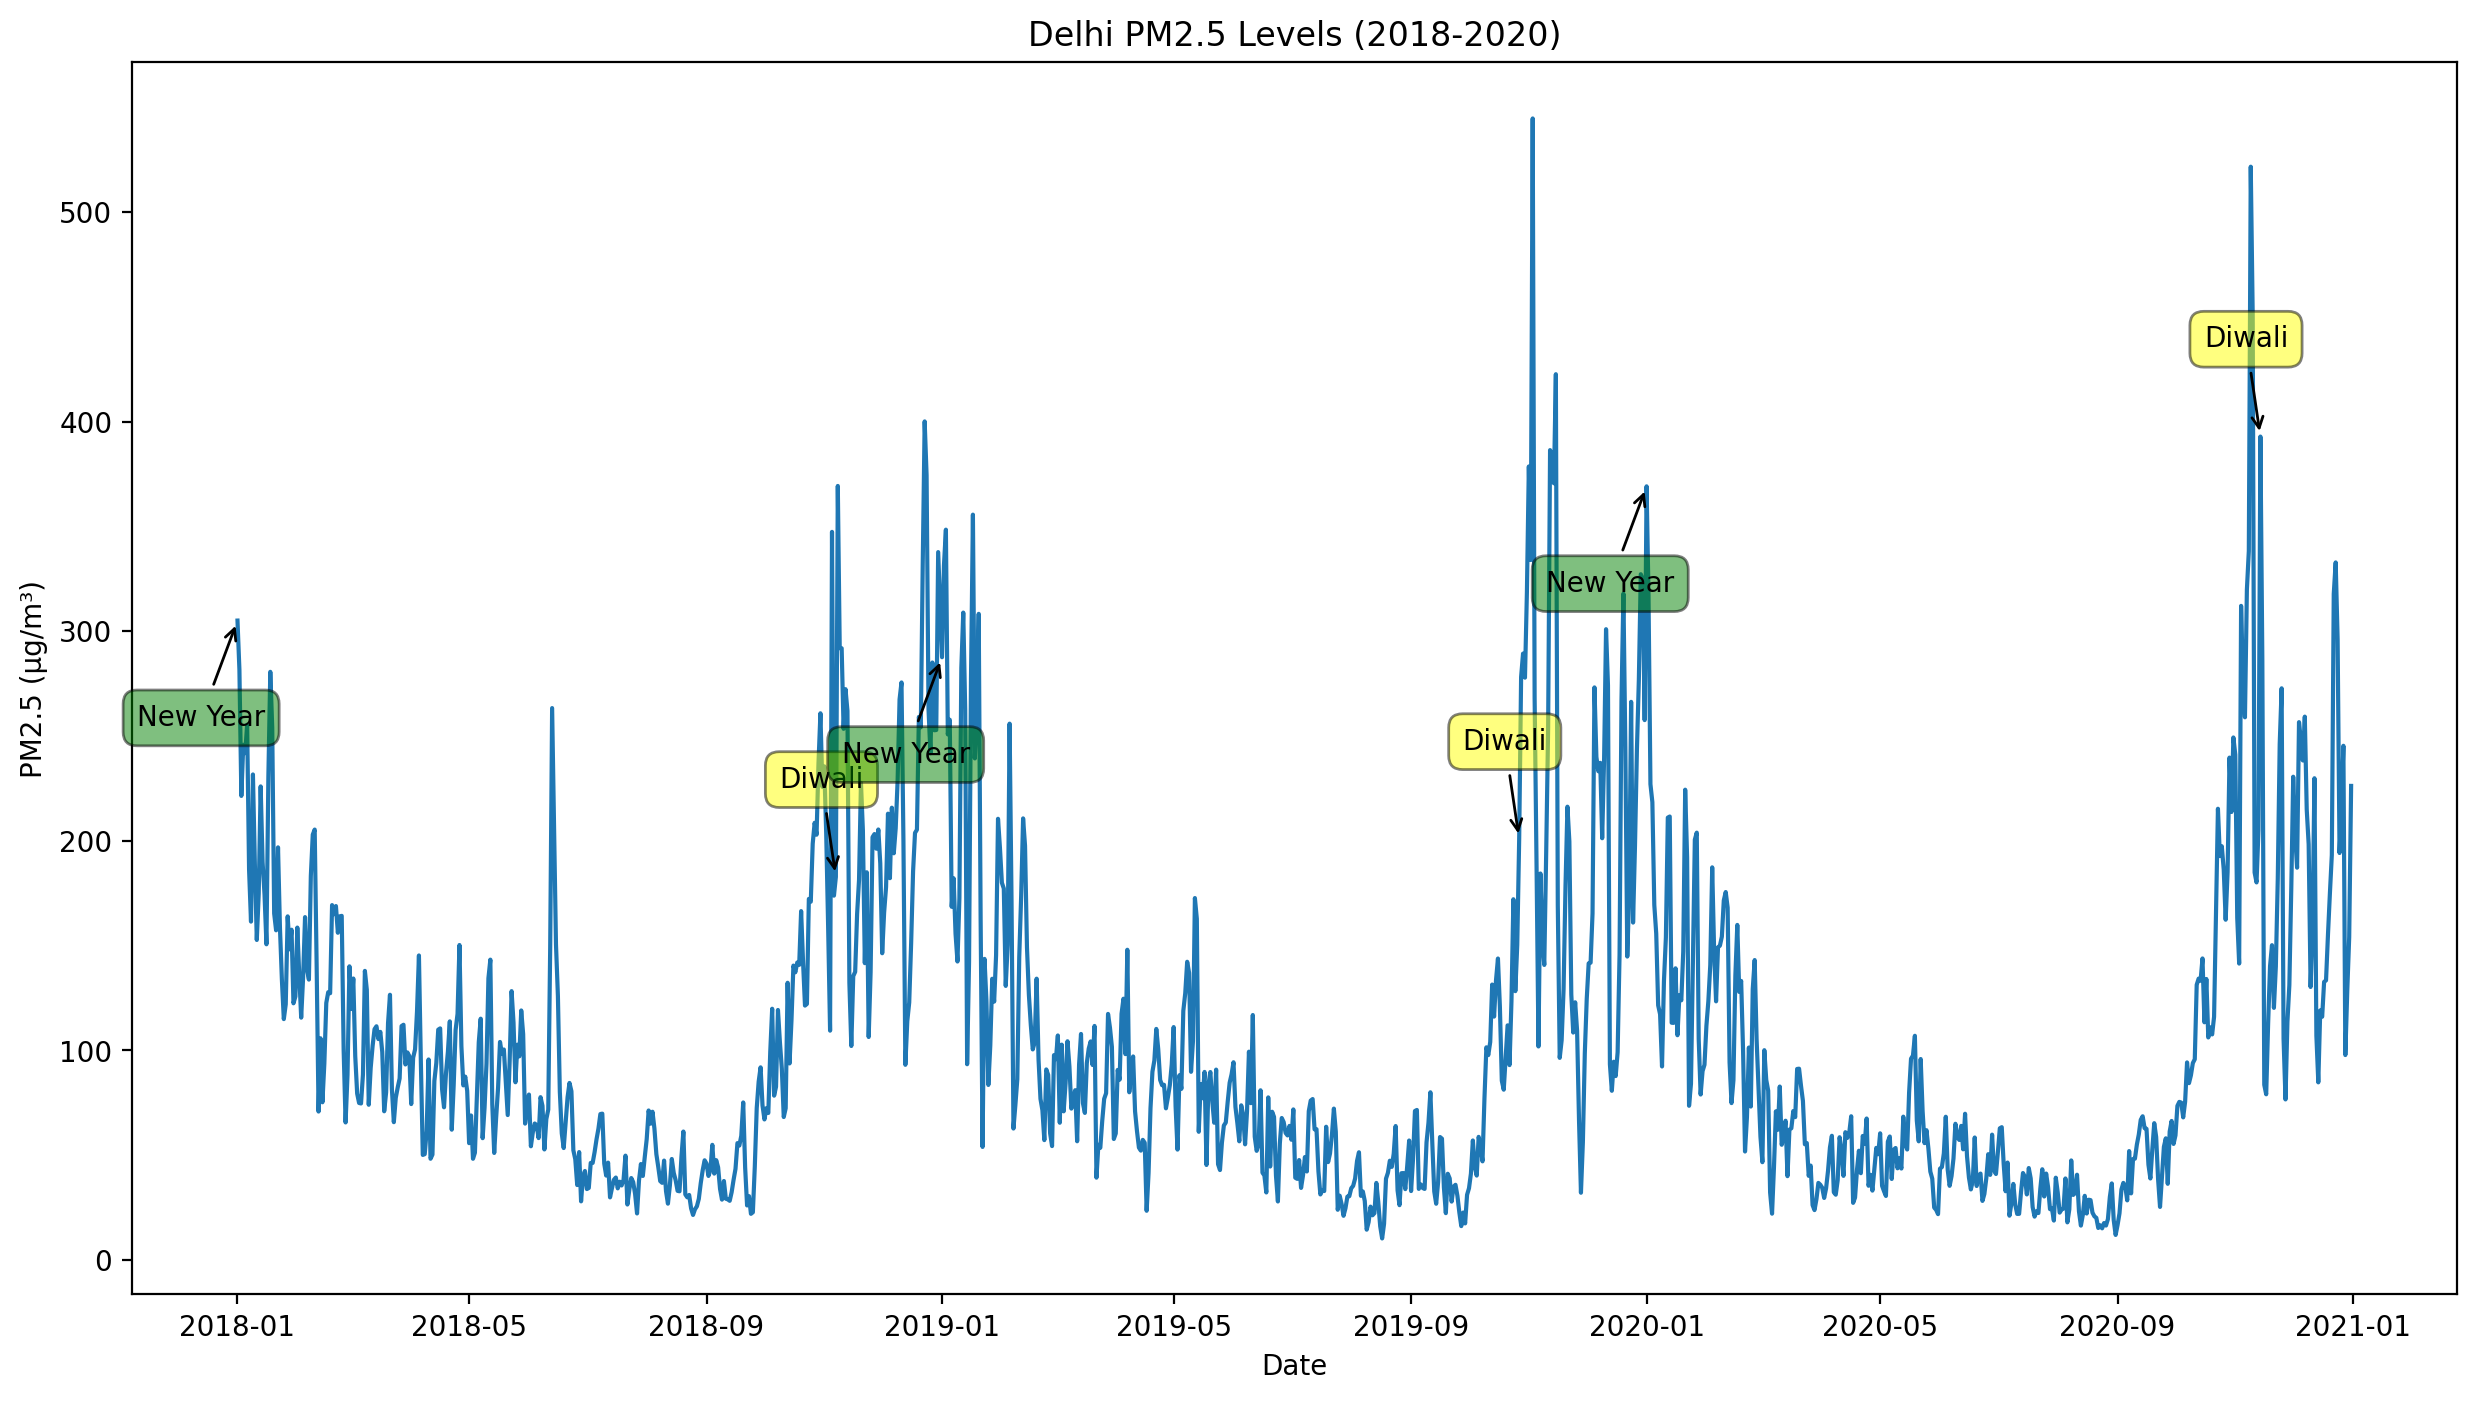

We observed spikes around Diwali and New year months , these is due to buring of crackers during the festive season


In [90]:

delhi_data = data[(data['city'] == 'Delhi') & (data['Timestamp'].between('2018-01-01', '2020-12-31'))]

daily_avg = delhi_data.groupby('Timestamp')['PM2.5'].mean().reset_index()

plt.figure(figsize=(15, 8))
plt.plot(daily_avg['Timestamp'], daily_avg['PM2.5'])
plt.title("Delhi PM2.5 Levels (2018-2020)")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")

diwali_dates = ['2018-11-07', '2019-10-27', '2020-11-14']
new_year_dates = ['2018-01-01', '2019-01-01', '2020-01-01']

for date in diwali_dates:
    plt.annotate('Diwali', xy=(pd.to_datetime(date), daily_avg.loc[daily_avg['Timestamp'] == date, 'PM2.5'].values[0]),
                 xytext=(10, 30), textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for date in new_year_dates:
    plt.annotate('New Year', xy=(pd.to_datetime(date), daily_avg.loc[daily_avg['Timestamp'] == date, 'PM2.5'].values[0]),
                 xytext=(10, -30), textcoords='offset points', ha='right', va='top',
                 bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()
print("We observed spikes around Diwali and New year months , these is due to buring of crackers during the festive season")

Highest NCAP Funded State's Air Quality Improvement

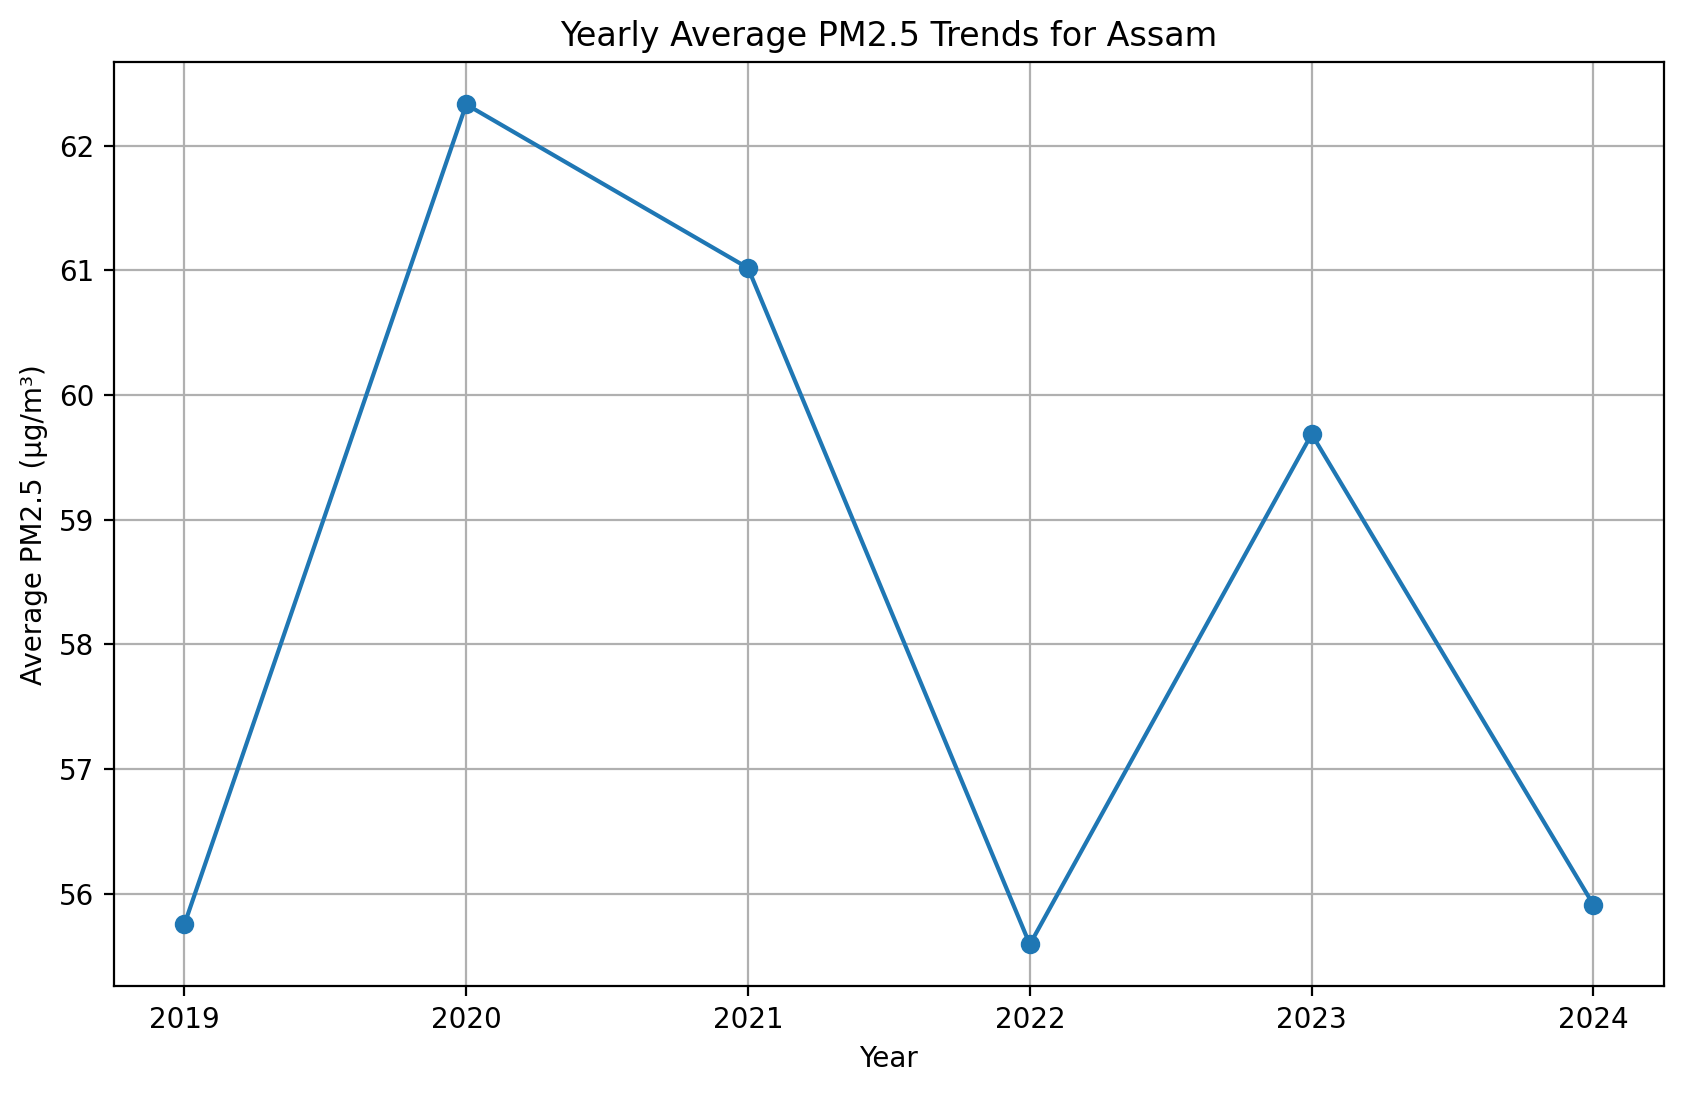

The state that received the highest NCAP funding in 2020 is Assam
There has been an improvement in air quality from 2020 to 2023.


In [92]:

highest_funded_state = ncap_funding.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()

state_data = data[data['state'] == highest_funded_state]

yearly_avg = state_data.groupby(state_data['Timestamp'].dt.year)['PM2.5'].mean()

plt.figure(figsize=(10, 6))
yearly_avg.plot(marker='o')
plt.title(f"Yearly Average PM2.5 Trends for {highest_funded_state}")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.grid(True)
plt.show()

print(f"The state that received the highest NCAP funding in 2020 is {highest_funded_state}")
if yearly_avg[2023] < yearly_avg[2020]:
    print("There has been an improvement in air quality from 2020 to 2023.")
else:
    print("There has not been a significant improvement in air quality from 2020 to 2023.")


Map of India with Sensor Locations

c:\Users\aruls\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:196: RuntimeWarning: driver ESRI Shapefile does not support open option CONFIG_OPTIONS
  return ogr_read(


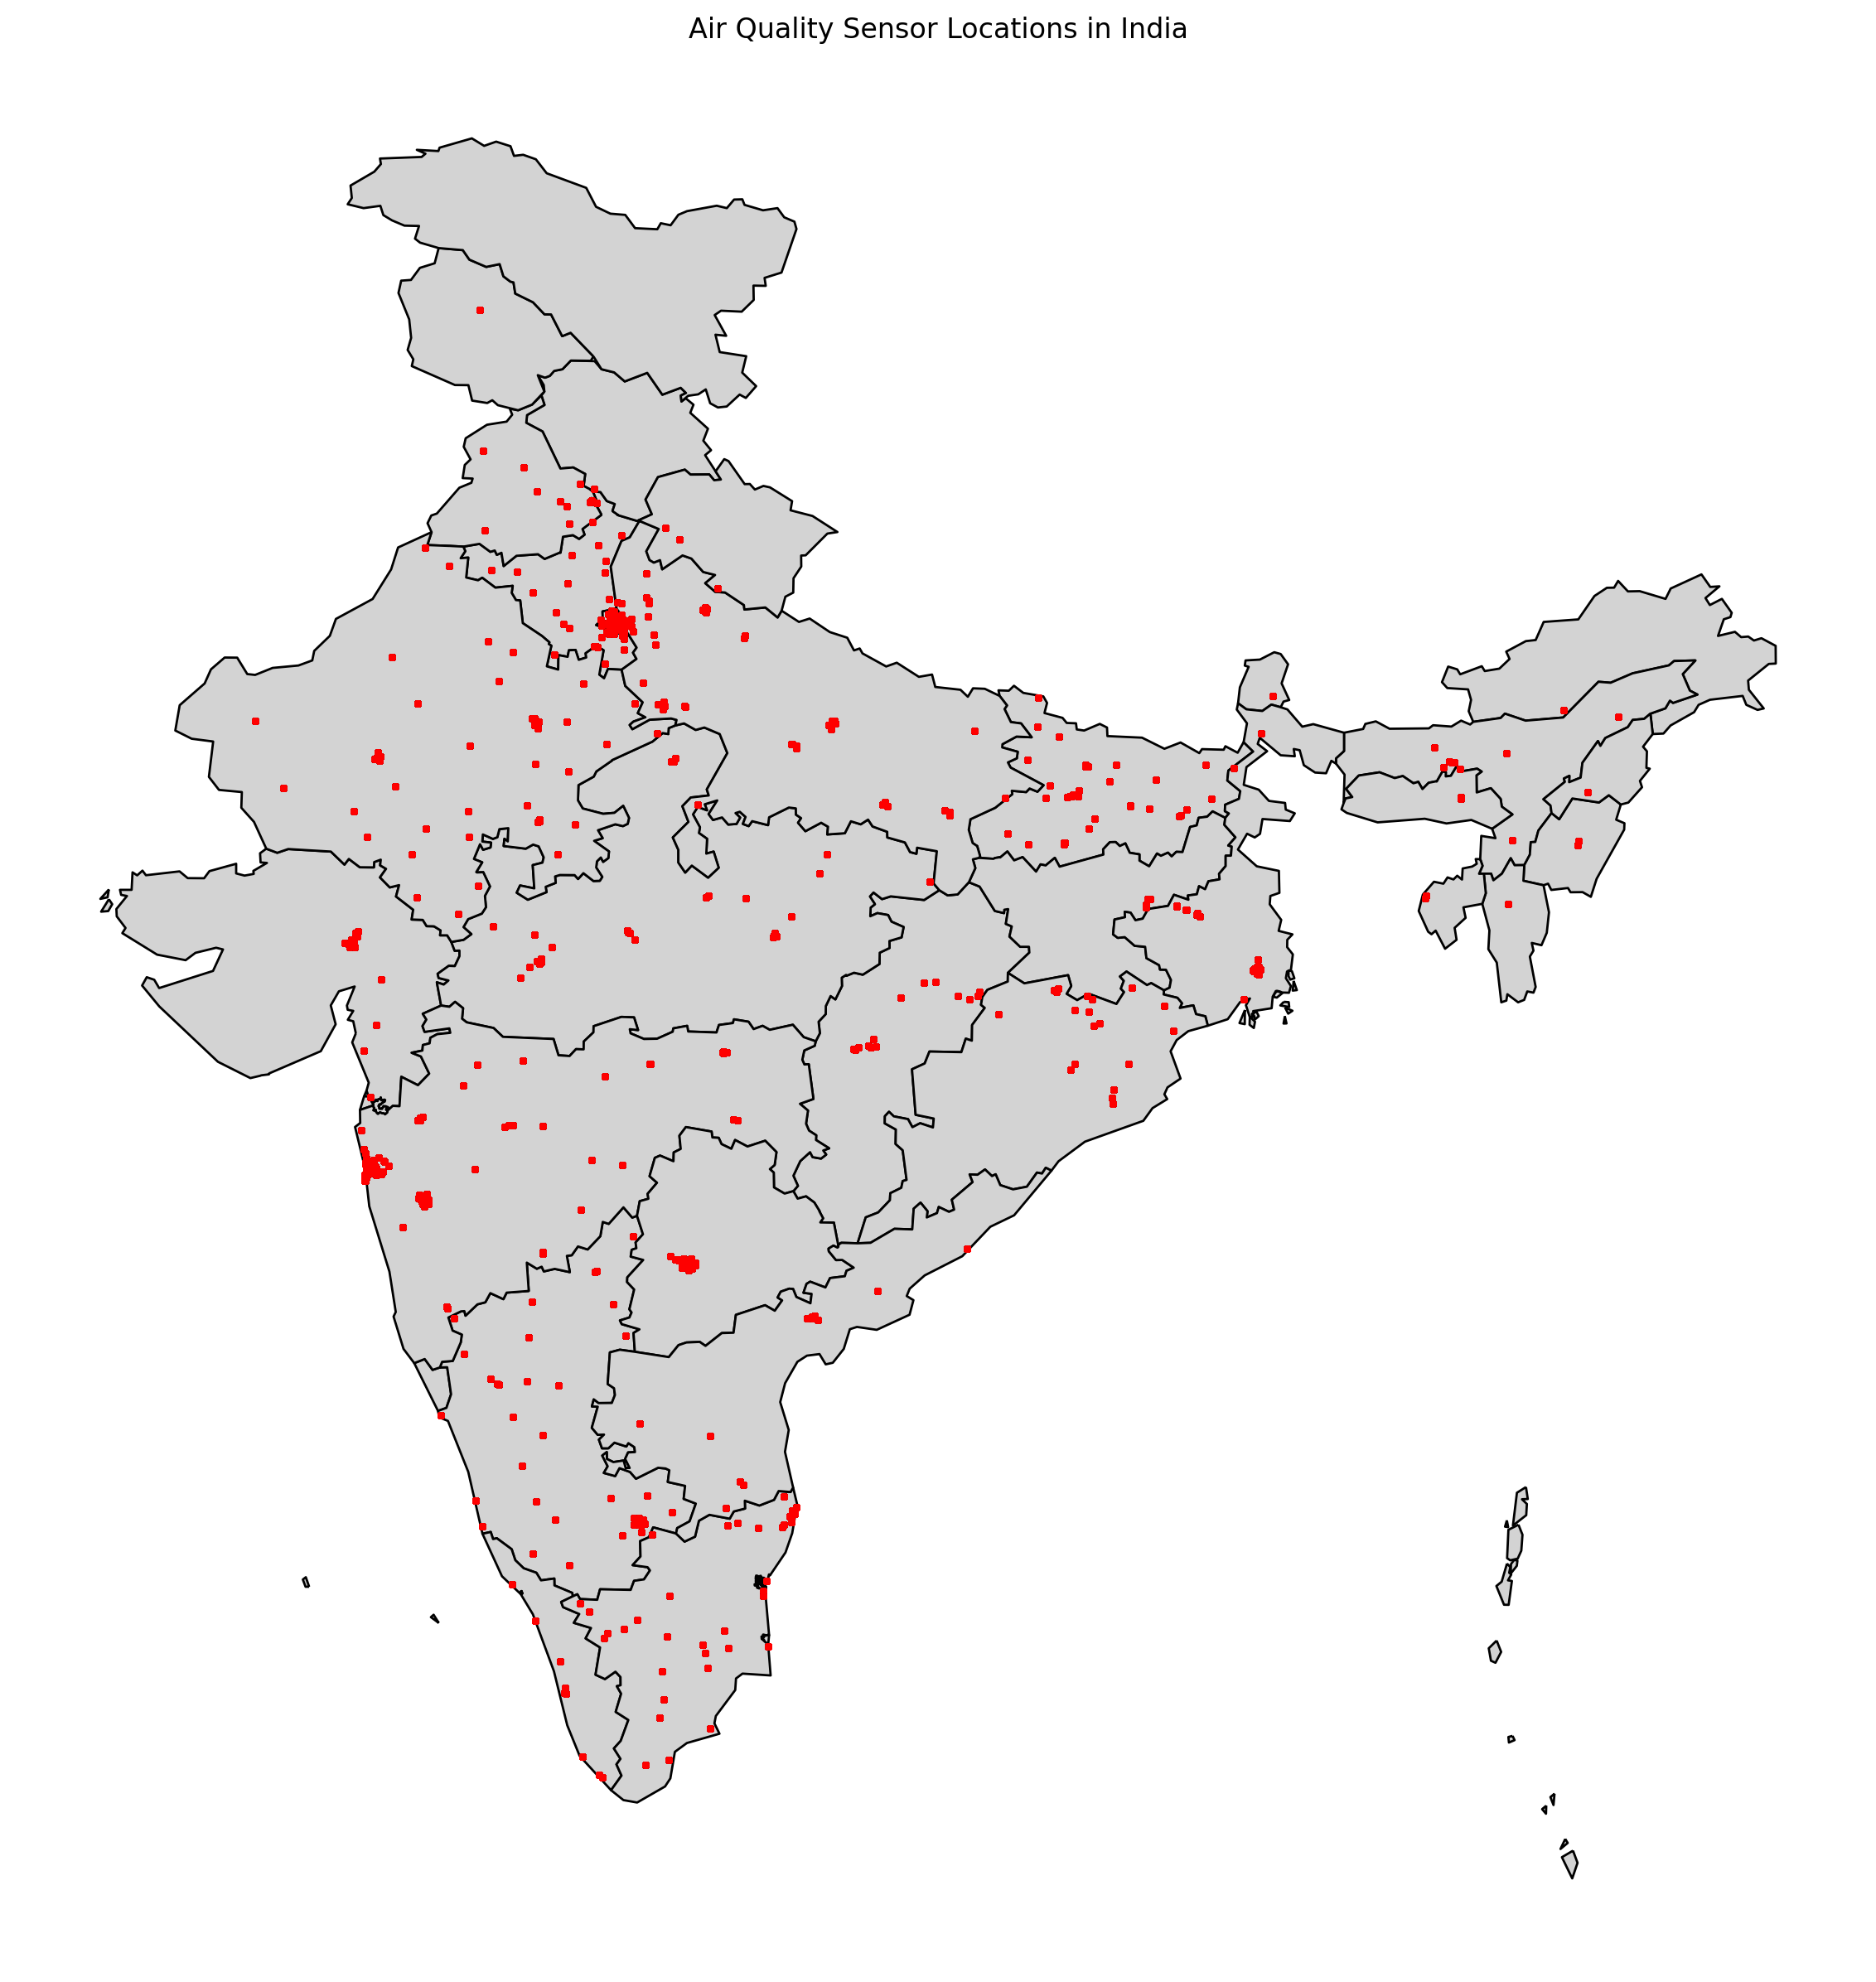

In [99]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude)
)

india = gpd.read_file("India.shp", config_options={'SHAPE_RESTORE_SHX': 'YES'})

fig, ax = plt.subplots(figsize=(15, 15))
india.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5, alpha=0.5)
plt.title('Air Quality Sensor Locations in India')
plt.axis('off')
plt.show()


### Something New and Interesting

C:\Users\aruls\AppData\Local\Temp\ipykernel_1416\312237123.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(state, (analysis_data['Total fund released'][i], analysis_data['PM2.5'][i]))


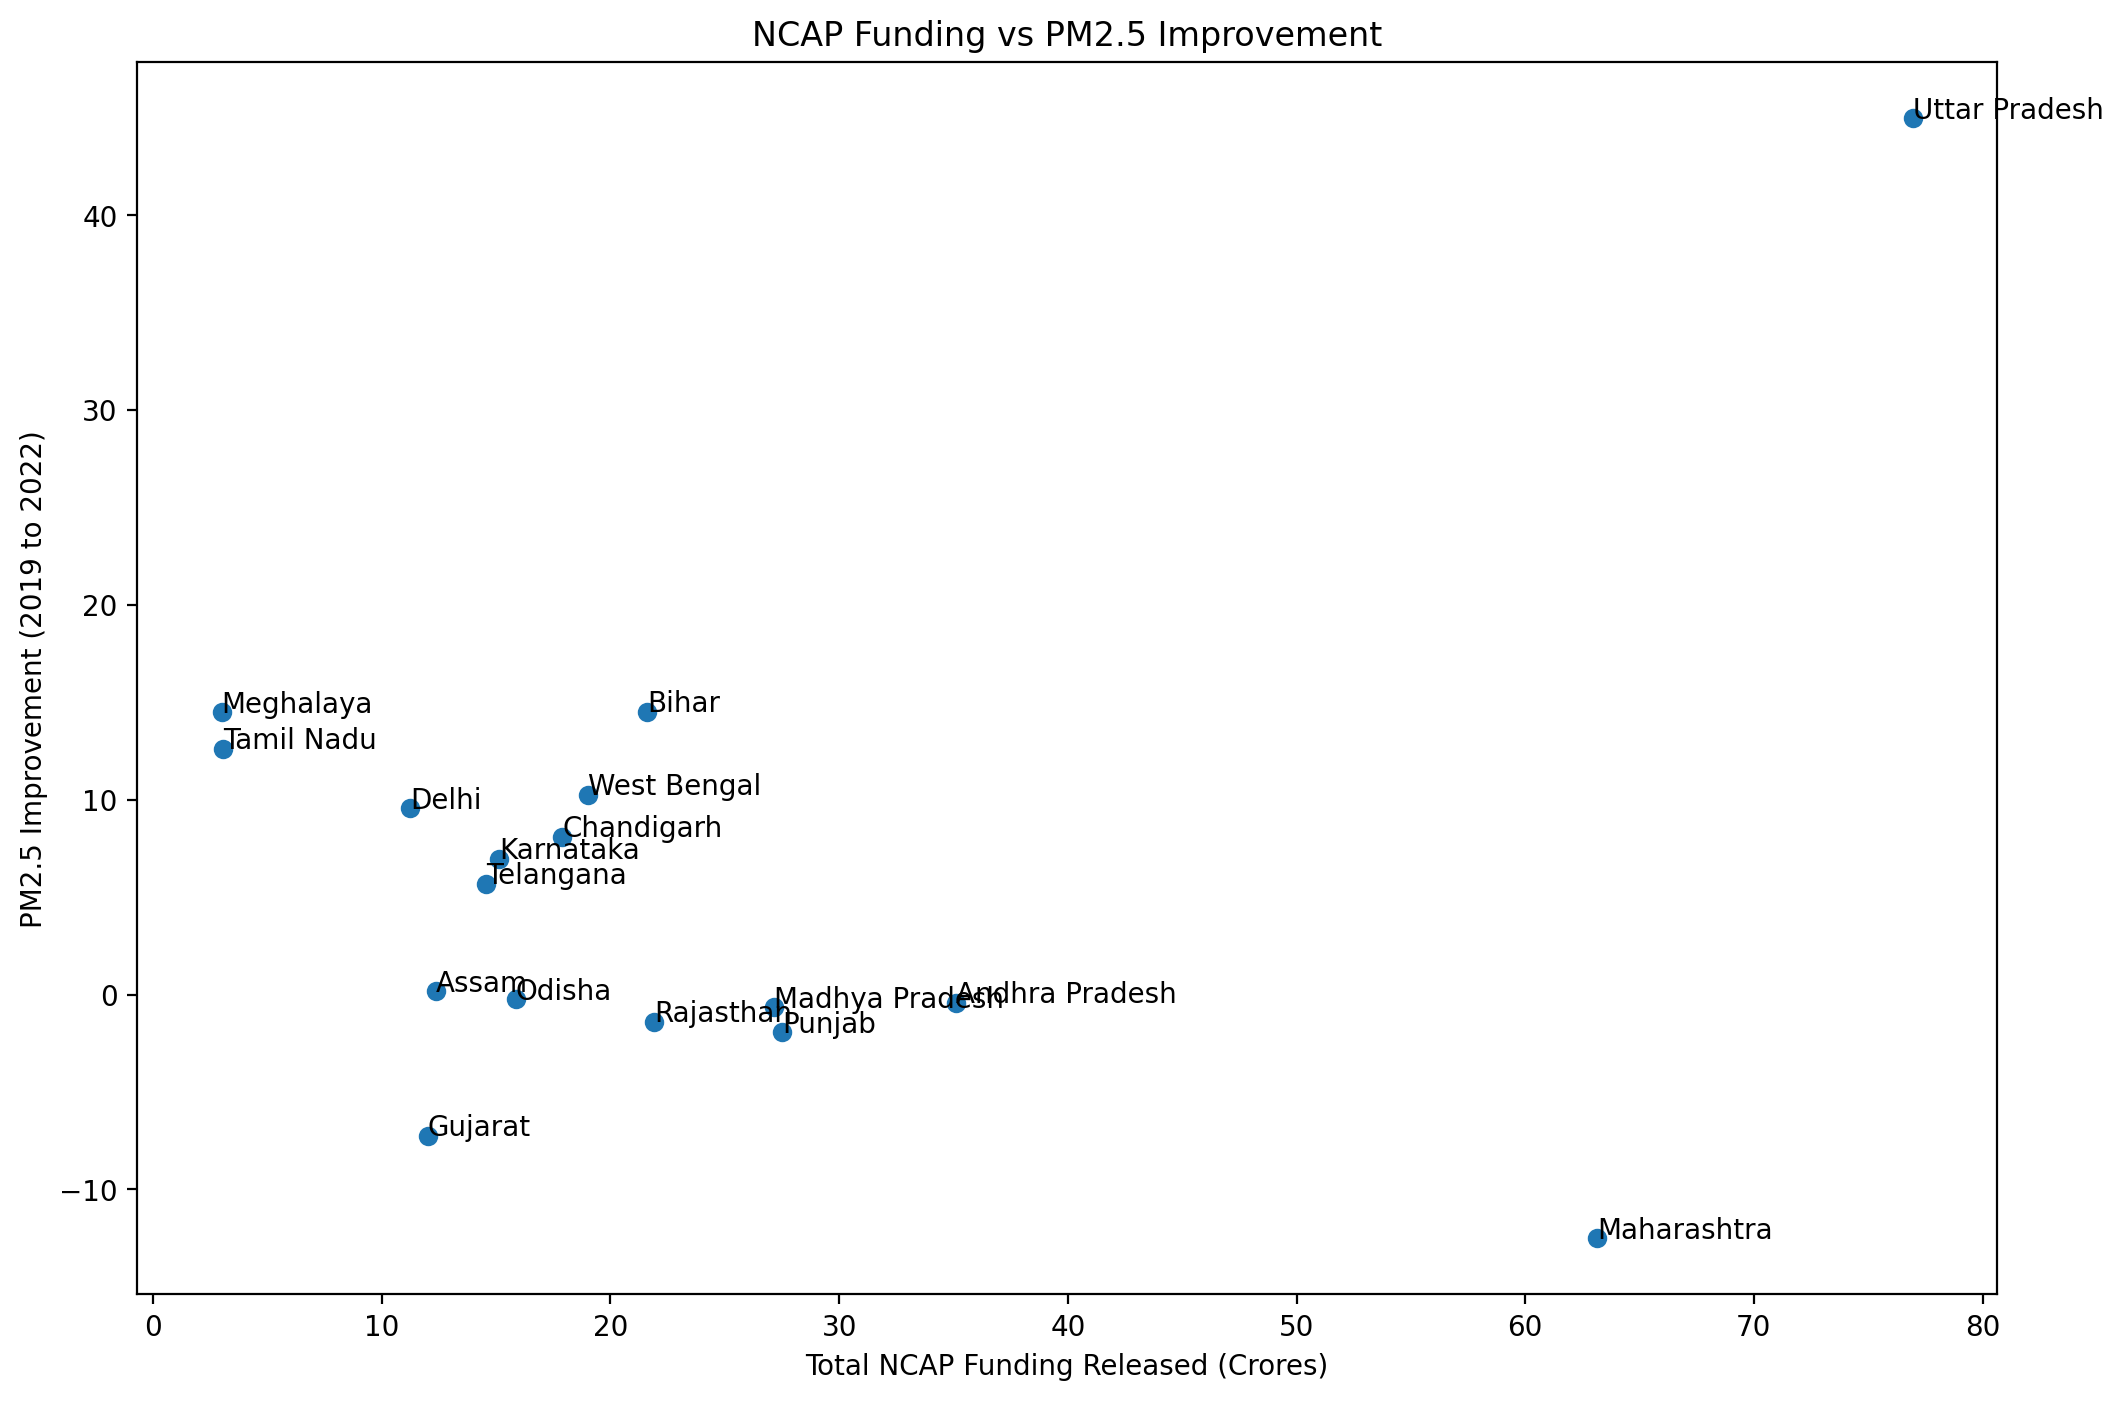

Correlation between NCAP funding and PM2.5 improvement: 0.28


In [96]:
state_funding = ncap_funding.groupby('State')['Total fund released'].sum()

pm25_2019 = data[data['Timestamp'].dt.year == 2019].groupby('state')['PM2.5'].mean()
pm25_2022 = data[data['Timestamp'].dt.year == 2022].groupby('state')['PM2.5'].mean()
pm25_improvement = pm25_2019 - pm25_2022

analysis_data = pd.merge(state_funding, pm25_improvement, left_index=True, right_index=True)

plt.figure(figsize=(12, 8))
plt.scatter(analysis_data['Total fund released'], analysis_data['PM2.5'])
plt.xlabel('Total NCAP Funding Released (Crores)')
plt.ylabel('PM2.5 Improvement (2019 to 2022)')
plt.title('NCAP Funding vs PM2.5 Improvement')

for i, state in enumerate(analysis_data.index):
    plt.annotate(state, (analysis_data['Total fund released'][i], analysis_data['PM2.5'][i]))

plt.show()

correlation = analysis_data['Total fund released'].corr(analysis_data['PM2.5'])
print(f"Correlation between NCAP funding and PM2.5 improvement: {correlation:.2f}")
